#1. Installation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 85.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3


In [ ]:
!pip install --quiet vietocr

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 9.8 MB/s eta 0:00:00


# 2. Extract Data

In [ ]:
!unzip /content/drive/MyDrive/training_data.zip -d /content/drive/MyDrive

In [ ]:
!unzip /content/drive/MyDrive/public_test.zip -d /content/drive/MyDrive

#3. EDA Dataset

Image Statistics:
             Width       Height
count  2700.000000  2700.000000
mean   1699.990370   113.622593
std     326.199623    20.240481
min     851.000000    58.000000
25%    1615.750000   110.000000
50%    1817.000000   118.000000
75%    1907.000000   125.000000
max    2634.000000   163.000000


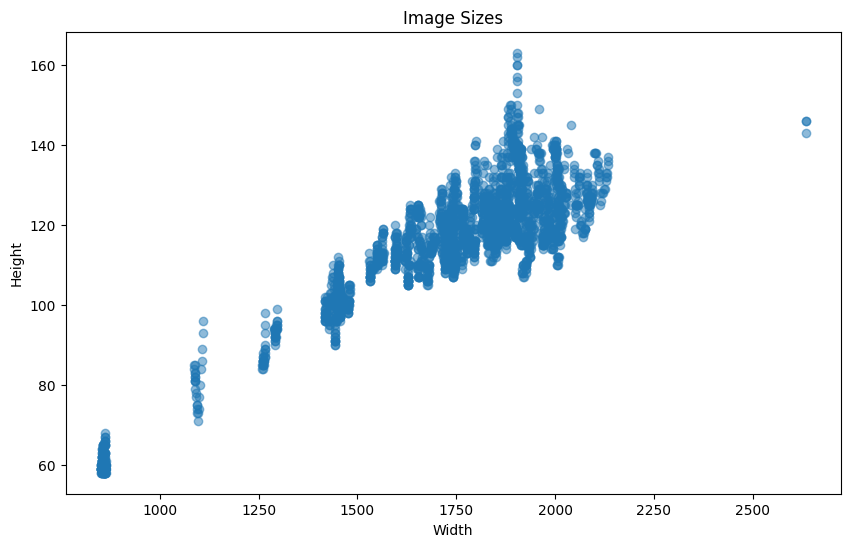

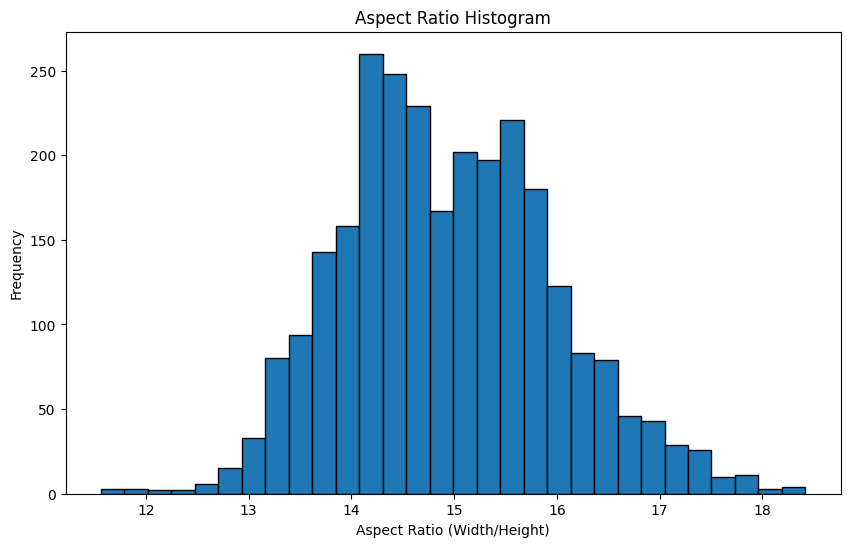

In [ ]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

# Set the path to your dataset
dataset_path = "/content/drive/MyDrive/training_data/images"

# Function to compute and display image statistics
def image_statistics(path):
    sizes = []
    for fold in os.listdir(path):
        fold_path = os.path.join(path, fold)
        image_files = os.listdir(fold_path)
        for image_file in image_files:
            img_path = os.path.join(fold_path, image_file)
            img = Image.open(img_path)
            sizes.append(img.size)

    sizes_df = pd.DataFrame(sizes, columns=['Width', 'Height'])
    print("Image Statistics:")
    print(sizes_df.describe())

    # Plot image sizes
    plot_image_sizes(sizes_df)

    # Plot aspect ratio histogram
    plot_aspect_ratio_histogram(sizes_df)

def plot_image_sizes(sizes_df):
    plt.figure(figsize=(10, 6))
    plt.scatter(sizes_df['Width'], sizes_df['Height'], alpha=0.5)
    plt.title('Image Sizes')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.show()

def plot_aspect_ratio_histogram(sizes_df):
    aspect_ratios = sizes_df['Width'] / sizes_df['Height']
    plt.figure(figsize=(10, 6))
    plt.hist(aspect_ratios, bins=30, edgecolor='black')
    plt.title('Aspect Ratio Histogram')
    plt.xlabel('Aspect Ratio (Width/Height)')
    plt.ylabel('Frequency')
    plt.show()

# Perform EDA
image_statistics(dataset_path)

In [ ]:
dataset_test_path = "/content/drive/MyDrive/public_test/images"
image_statistics(dataset_test_path)

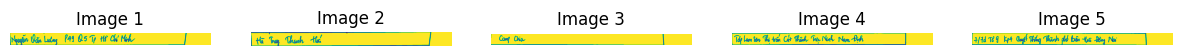

In [ ]:
import random
# Function to load and display random images
def display_random_images(path, num_images=5):
    for fold in os.listdir(path):
        fold_path = os.path.join(path, fold)
        try:
          image_files = random.sample(os.listdir(fold_path), num_images)
        except:
          continue
        plt.figure(figsize=(15, 5))
        for i, image_file in enumerate(image_files, 1):
            img_path = os.path.join(fold_path, image_file)
            img = Image.open(img_path)

            plt.subplot(1, num_images, i)
            plt.imshow(img)
            plt.title(f"Image {i}")
            plt.axis('off')
        break

        plt.show()
display_random_images(dataset_path, num_images=5)

In [ ]:
max_length_text = ""
i=1
with open("/content/drive/MyDrive/training_data/labels.txt", "r", encoding="utf-8") as file:
  lines = file.readlines()
  for line in lines:
    text = line.strip().split("\t")[1]
    if len(text)>len(max_length_text):
      max_length_text = text
print(len(max_length_text))

68


In [ ]:
import os

# Set the path to the folder containing annotation files
folder_path = "/content/drive/MyDrive/training_data/annotations"

# Create an empty string to store concatenated content
concatenated_content = ""

# Iterate through all files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Check if the path is a file (not a directory)
    if os.path.isfile(file_path):
        with open(file_path, 'r', encoding='utf-8') as file:
            # Read the content of each file and append to the concatenated string
            file_content = file.read().strip()
            concatenated_content += file_content + '\n'

# Set the path for the output concatenated file
output_path = "/content/drive/MyDrive/training_data/labels.txt"

# Write the concatenated content to the output file
with open(output_path, 'w', encoding='utf-8') as output_file:
    output_file.write(concatenated_content)

print(f"Concatenation completed. Output file: {output_path}")

Concatenation completed. Output file: /content/drive/MyDrive/training_data/labels.txt


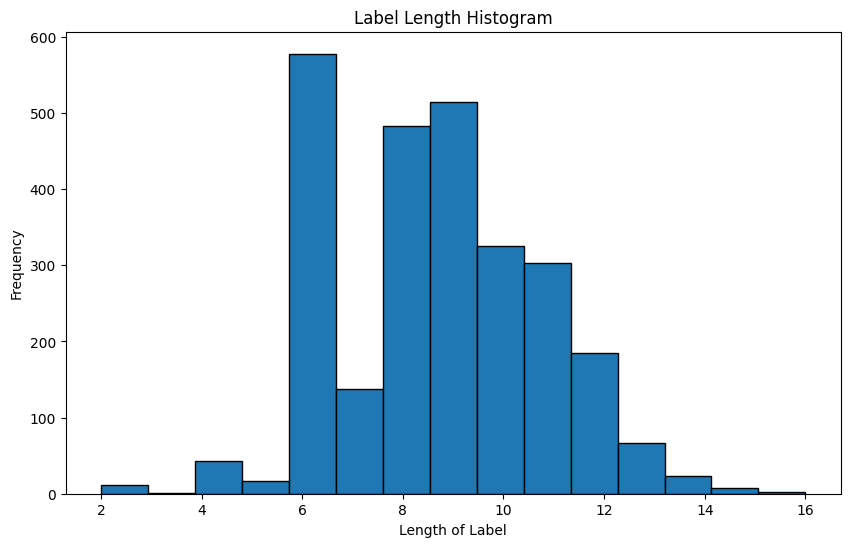

In [ ]:
import matplotlib.pyplot as plt

# Read data from file
file_path = "/content/drive/MyDrive/training_data/labels.txt"  # Replace with the actual path to your file
with open(file_path, 'r', encoding='utf-8') as file:
    data = file.readlines()

# Extract label lengths
label_lengths = [len(line.split('\t')[1].strip().split()) for line in data]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(label_lengths, bins=15, edgecolor='black')
plt.title('Label Length Histogram')
plt.xlabel('Length of Label')
plt.ylabel('Frequency')
plt.show()

# 4. Split Dataset

In [ ]:
import os
import random

# Set the path to the annotation file
annotation_file_path = "/content/drive/MyDrive/training_data/labels.txt"

# Set the ratio for splitting (e.g., 80% train, 20% val)
train_ratio = 0.8

# Read the content of the annotation file
with open(annotation_file_path, 'r', encoding='utf-8') as annotation_file:
    annotations = annotation_file.readlines()

# Shuffle the annotations before splitting
random.shuffle(annotations)

# Split the annotations into training and validation sets
num_annotations = len(annotations)
num_train = int(num_annotations * train_ratio)

train_annotations = annotations[:num_train]
val_annotations = annotations[num_train:]

# Set the paths for the output train and val files
train_output_path = "/content/drive/MyDrive/training_data/train.txt"
val_output_path = "/content/drive/MyDrive/training_data/val.txt"

# Write the training annotations to the output file
with open(train_output_path, 'w', encoding='utf-8') as train_file:
    train_file.writelines(train_annotations)

# Write the validation annotations to the output file
with open(val_output_path, 'w', encoding='utf-8') as val_file:
    val_file.writelines(val_annotations)

print(f"Splitting and saving completed. Train file: {train_output_path}, Val file: {val_output_path}")

Splitting and saving completed. Train file: /content/drive/MyDrive/training_data/train.txt, Val file: /content/drive/MyDrive/training_data/val.txt


#5. Training Setup

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import torch
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
from vietocr.tool.translate import build_model
from torch import nn
from vietocr.model.trainer import Trainer
import os

In [ ]:
def save_models(model, file_name):
    output_path = '/content/drive/MyDrive/viet_ocr/weights/'
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    saved_path = os.path.join(output_path, file_name)
    if os.path.exists(saved_path):
        os.remove(saved_path)
    print('Save files in: ', saved_path)
    torch.save(model.state_dict(), saved_path)

def save_torchscript_model(model, file_name):
    output_path = '/content/drive/MyDrive/viet_ocr/weights/'
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    model_filepath = os.path.join(output_path, file_name)
    torch.jit.save(torch.jit.script(model), model_filepath)
    print('Save in: ', model_filepath)
    return model_filepath

def load_torchscript_model(model_filepath, device):

    model = torch.jit.load(model_filepath, map_location=device)

    return model

In [ ]:
config = Cfg.load_config_from_name('vgg_seq2seq')


In [ ]:
%cd /content/
dataset_params = {
    'name':'hw',
    'data_root':'./drive/MyDrive/training_data/images/',
    'train_annotation':'/content/drive/MyDrive/training_data/train.txt',
    'valid_annotation':'/content/drive/MyDrive/training_data/val.txt'
}

params = {
         'print_every':10,
         'valid_every':135,
          'iters':3375,
          'checkpoint':'/content/drive/MyDrive/viet_ocr/checkpoint/transformerocr_checkpoint.pth',
          'export':'/content/drive/MyDrive/kapacha_fintune/weights/model.pth',
          'metrics': 540
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'
config['cnn']['pretrained']=False
config['weights'] = "/content/drive/MyDrive/pretrained_quantized/seq2seq.pth"

/content


In [ ]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'seq2seq',
 'transformer': {'encoder_hidden': 256,
  'decoder_hidden': 256,
  'img_channel': 256,
  'decoder_embedded': 256,
  'dropout': 0.1},
 'optimizer': {'max_lr': 0.001, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 10,
  'valid_every': 135,
  'iters': 3375,
  'export': '/content/drive/MyDrive/kapacha_fintune/weights/model.pth',
  'checkpoint': '/content/drive/MyDrive/viet_ocr/checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 540},
 'dataset': {'name': 'hw',
  'data_root': './drive/MyDrive/training_data/images/',
  'train_annotation': '/content/drive/MyDrive/training_data/train.txt',
  'valid_annotation': '/content/drive/MyDrive/training_data/val.txt',

In [ ]:
device = config['device']

In [ ]:
model, vocab = build_model(config)


In [ ]:
weights = config['weights']
model.load_state_dict(torch.load(weights, map_location=torch.device(device)))

<All keys matched successfully>

In [ ]:
class QuantizedCNN(nn.Module):
    def __init__(self, model_fp32):
        super(QuantizedCNN, self).__init__()

        # QuantStub converts tensors from floating point to quantized.
        # This will only be used for inputs.
        self.quant = torch.quantization.QuantStub()

        # DeQuantStub converts tensors from quantized to floating point.
        # This will only be used for outputs.
        self.dequant = torch.quantization.DeQuantStub()

        # FP32 model
        self.model_fp32 = model_fp32

    def forward(self, x):
        # manually specify where tensors will be converted from floating
        # point to quantized in the quantized model
        x = self.quant(x)
        x = self.model_fp32(x)

        # manually specify where tensors will be converted from quantized
        # to floating point in the quantized model
        x = self.dequant(x)
        return x

In [ ]:
model = model.train()
for m in model.cnn.model.modules():
    if type(m) == nn.Sequential:
        for n, layer in enumerate(m):
            if type(layer) == nn.Conv2d:
                torch.quantization.fuse_modules(m, [str(n), str(n + 1), str(n + 2)], inplace=True)

In [ ]:
quantized_cnn = QuantizedCNN(model_fp32=model.cnn)
quantized_cnn.qconfig = torch.quantization.get_default_qconfig("fbgemm")

# Print quantization configurations
print(quantized_cnn.qconfig)

# the prepare() is used in post training quantization to prepares your model for the calibration step
quantized_cnn = torch.quantization.prepare_qat(quantized_cnn, inplace=True)

QConfig(activation=functools.partial(<class 'torch.ao.quantization.observer.HistogramObserver'>, reduce_range=True){}, weight=functools.partial(<class 'torch.ao.quantization.observer.PerChannelMinMaxObserver'>, dtype=torch.qint8, qscheme=torch.per_channel_symmetric){})


/usr/local/lib/python3.10/dist-packages/torch/ao/quantization/observer.py:214: UserWarning: Please use quant_min and quant_max to specify the range for observers.                     reduce_range will be deprecated in a future release of PyTorch.
  warnings.warn(


In [ ]:
model.cnn = quantized_cnn

In [ ]:
model.train()
model = model.to(device)
trainer = Trainer(config, model, False)

In [ ]:
# visualize dataset
trainer.visualize_dataset()

In [ ]:
trainer.train()


In [ ]:
trainer.visualize_prediction()


In [ ]:
trainer.precision()

(0.4914772727272727, 0.89207816)

# 6. Testing Phase

In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')
# Pytorch support only cpu device
config['device'] = 'cpu'
config['cnn']['pretrained']=False
config['weights'] = "/content/drive/MyDrive/vgg_transformer.pth"

In [ ]:
model, vocab = build_model(config)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [ ]:
model = model # replace with your model
param_size = 0
for param in model.parameters():
    param_size += param.nelement() * param.element_size()
buffer_size = 0
for buffer in model.buffers():
    buffer_size += buffer.nelement() * buffer.element_size()
size_all_mb = (param_size + buffer_size) / 1024**2
print('model size: {:.3f}MB'.format(size_all_mb))

model size: 144.666MB


In [ ]:
# fuse layer
model = model.eval()
for m in model.cnn.model.modules():
    if type(m) == nn.Sequential:
        for n, layer in enumerate(m):
            if type(layer) == nn.Conv2d:
                torch.quantization.fuse_modules(m, [str(n), str(n + 1), str(n + 2)], inplace=True)

In [ ]:
# prepare model for quantize aware training
quantized_cnn = QuantizedCNN(model_fp32=model.cnn)
quantized_cnn.qconfig = torch.quantization.get_default_qconfig("fbgemm")

# Print quantization configurations
print(quantized_cnn.qconfig)

# the prepare() is used in post training quantization to prepares your model for the calibration step
quantized_cnn = torch.quantization.prepare_qat(quantized_cnn, inplace=True)

QConfig(activation=functools.partial(<class 'torch.ao.quantization.observer.HistogramObserver'>, reduce_range=True){}, weight=functools.partial(<class 'torch.ao.quantization.observer.PerChannelMinMaxObserver'>, dtype=torch.qint8, qscheme=torch.per_channel_symmetric){})


In [ ]:
quantized_cnn = quantized_cnn.to(torch.device('cpu'))
model.cnn = torch.quantization.convert(quantized_cnn, inplace=True)

In [ ]:
detector = Predictor(config)
Predictor.model=model


In [ ]:
model = model # replace with your model
param_size = 0
for param in model.parameters():
    param_size += param.nelement() * param.element_size()
buffer_size = 0
for buffer in model.buffers():
    buffer_size += buffer.nelement() * buffer.element_size()
size_all_mb = (param_size + buffer_size) / 1024**2
print('model size: {:.3f}MB'.format(size_all_mb))

model size: 67.694MB


In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/vgg_transform.pth")


0.5465679168701172


'Tổ 8 Ấp Cà Na An Bình Phú Giác Bình Dương'

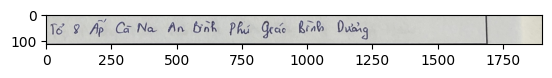

In [ ]:
img = '/content/drive/MyDrive/public_test/images/1/20.jpg'
img = Image.open(img)
plt.imshow(img)
import time
start = time.time()
s = detector.predict(img)
print(time.time()-start)
s

#7. Create Submission

In [ ]:
import os
from PIL import Image
import pandas as pd

# Set the path to your dataset
dataset_path = "/content/drive/MyDrive/public_test/images"

# Function to compute and display image statistics
def infer(path, detector):
    df = pd.DataFrame({
        'id': [],
        'answer': []
    })

    for fold in os.listdir(path):
        fold_path = os.path.join(path, fold)
        image_files = os.listdir(fold_path)

        for image_file in image_files:
            img_path = os.path.join(fold_path, image_file)
            img = Image.open(img_path)
            s = detector.predict(img)
            print(s)
            file_path = os.path.join(fold, image_file)  # Corrected the file_path creation
            df = df.append({'id': file_path, 'answer': s}, ignore_index=True)

    df.to_csv('sample_submission.csv', index=False)

infer(dataset_path, detector)

Giai Xuân Tân Kỳ Nghệ An


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Tín Nghĩa Xuân Thiện Thống Nhất Đồng Nai


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Vạn Thắng Ba Yê Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Hồng Châu Yên Lạc Vĩnh Phúc


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


P193b A8 Kđtm Đ/kim Đ/công Định Công Hoàng Hai Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xóm Nam Lê Hải Hưng Hải Hậu Nam Định


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tập Ngãi Tiểu Cần Trà Vinh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn 8 Tích Giang Phúc Thọ Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn 9 Minh Quán Trấn Yên Yên Bái


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Liễu Đô Lục Yên Yên Bác


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xóm 15 Nam Dương Nam Trực Nam Định


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp An Thạnh Tân An Thạnh Bình Tần Vĩnh Long


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Vạn Tg Thái Bảo Gia Bình Bắc Ninh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Trd Nà Đăng Thị Trấn Yễn Lạc Na Rì Bắc Kạn


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Gò Quảc Kiên Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Phú Châu Đông Hưng Thái Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Yên Thường Gia Lâm Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Thanh Giang Thanh Cao Thanh Oai Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


331/9 Bến Vân Đồn Phường 93 Quận 7 Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Tân Hội Điền Lộc Phong Điền Thừa Thiên Huế


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Duy Trinh Duy Xuyên Quảng Nam


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Ngã Cạy Đông Yên An Biên Kiên Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Nhơn Bình Thành Phố Quy Nhơn Bình Định


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Bãi Trành Như Xuân Thanh Hoá


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xuân Lĩnh Nghi Xuân Hà Tĩnh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tâ Đền Rhế Khành Tổ Dân Phố 76 Khánh Xuân Tp Buôn Ma Thuột Đắk Lắk


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Chung 1 Ngũ Kiên Vĩnh Tường Vĩnh Phúc


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thông Giang Hồng 7 Cẩm Giang Cẩm Thuỷ Thanh Hoá


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp 5 Mỹ Đồng Tháp Mười Đồng Tráp


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thị Trấn Quảng Hà Hải Hà Quảng Ninh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xóm 21 Thôn Tuân Lễ Phước Hiệp Tng Phước Bình Đình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Bến Sần Phước Thiền Nhơn Trạch Đồng Nai


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Kiến Thuỵ Hải Phòng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Phú Thuỵ Tp Phan Thiết Bình Thuận


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Bình Khánh Thành Phố Long Xuyên An Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Hải Cảng Thành Phố Quy Khơn Bình Đính


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


22/256 Trường Trinh P Quang Trính Tp Nam Định


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn 9 Lãm Trạch Bố Trạch Quảng Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp 6 Tân Lộc Thới Bình Cà Mau


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Phú Mỹ Hạ Phú Thọ Phú Tân An Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 1 Thông 9 Hầm Đức Hàm Thuận Bắc Bình Thuận


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Điện Quang Thi Xã Điện Bần Quảng Nam


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Nam Cổ Hiền Hiến Nênh Quảng Ninh Quảng Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Trưng An Mỹ Tho Tiến Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Bành Lội Bình Chánh Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thị Xã Bình Minh Vĩnh Long


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Sác Sơng Ngọc Thành Giồng Riềng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Hưng Gong Bình Chánh Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Hậu Bốc Đậc Hắc Kế Sác Trăng Sóc Trăng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 65 Khu Phố 4 Trần Quang Diệu Tp Quy Nhơn Bình Đình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tiểu Kau 95 Tt Phú Yên


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


21/6 Phạm Viết Chánh P 59 Bình Thạnh Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ Hồ An Mỹ Quỳnh Bhu Thán Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Kuyện Phú Mỹ Bình Định


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tâm Ngọc Thành Phố Tam Kỳ Quảng Nam


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Hoà Bắc Đại Nghĩa Đại Lộc Quảng Nam


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Diêm Vân Phước Thuận Tuy Phước Bình Định


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Hương Ngai Thạch Thất Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xã Đông Xuân Huyệp Đông Hưng T Thái Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thanh Mỹ Lợi Tp Thư Đức Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


367/2 Ấp Thạnh Qui A Bình Thạnh Thạnh Phú Bến Tre


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 3 Hội Thương Thành Phố Pliku Gia Lai


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Cẩm Châu Cẩm Thuỷ Thanh Hoá


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tân Thành Tp Ninh Bình Ninh Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 6 Khu Phố A Thị Trấn Tân Hiệp Tân Hiệp Kiên Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


99/75 Lý Chính Thắng P Võ Thị Sán Q9 Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


2596/37 Tp 81 Tân Tạo Bình Tân Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Bình Trị Bình Sơn Quảng Ngãi


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thơn Lăng Quảng Tri Phú Chiêm Hoá Tuyện Quang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


483/98 Kp8 Tam Hiệp Thành Phố Biên Hoà Đồng Nai


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Phú Tâm Châu Thành Sóc Trăng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xuân Thành Xuân Lộc Đềng Nai


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


451/39 Lạc Long Quân Phường 12 Quận 64 Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thị Trấn Mỹ Luông Chọ Môi An Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Phù Đồng Nhôn Trạch Đồng Nai


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Số 87 Trần Kim Xuyến Hoà Xuân Cẩm Lệ Đà Nẵng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Bản Chuối Lâm Hoá Tuyên Quang Quảng Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


7718/42 Phạm Thế Hiển Phường 4 Quận 6 Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xuân Tây Trường Xuân Tan Kỳ Quảng Nam


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


59 Linh Trung Kp3 Lịnh Truy Thành Phố Thừ Đức Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


1/72b Ấp 8 Nhơn Đức Nhà Vè Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Hoà Mạc Thị Xã Duy Tiên Hà Nam


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Căn 4683 Gct8 Kđt Vĩnh d/Anu Đĩnh Ngọc Nha Trang K/hoà


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Anh Thạnh Trung Chợ Mới An Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tt Tân Trụ Tân Trụ Long An


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Trúc Lâm Hoàng Diệu Gia Lộc Hải Dương


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xóm Hương Sơn Tân Hương Thị Xã Phổ Yên Thái Nguyên


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Trường Yên Thương Mỹ Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


9/28 Phạm Quý Thích Tân Quý Tân Phú Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Hoàng Dụ Kỳ Khang Kỳ Anh Hà Tĩnh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Trung Văn Nam Từ Liêm Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Khốc 8 Vĩnh Điện Đận Bàn Quảng Nam


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp An Chu Bắc Sơn Trảng Bom Đồng Nai


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Chân Sơn Hương Sơn Bình Xuyên Vĩnh Phúc


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Khôm 8 Phường 8 Thành Phố Cà Mau Cà Mau


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Thọ Lộc Minh Khai Vũ Thư Thái Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xã Khánh Sơn Huyện Nam Đần Nghệ An


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Phú Yên Phú Xuyên Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Nghĩa Lộ Vống Xuyên Phúc Thọ Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Vũ Thắng Kiến Xương Thái Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Trụ Thạch Bân Giản Lập Thạch Vĩnh Phúc


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Phố 7 Ấp 8 Phúc Vinh Định Quán Đồng Nai


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 8 P Long Biên Long Biên Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


438 Nhơn Thuận Nhơn Thạnh Trung Tp Tân An Long An


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tràng Minh Kiến An Hải Phòng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Văn Xá Kim Bảng Hà Nam


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thị Trấn Plai Kần Ngọ Hồi Kon Tương


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Vĩnh Thịnh Vĩnh Tường Vĩnh Phúc


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Long Điền Tây Đông Hải Bạc Liêu


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Hợp Thành Phú Nhuận Lục Ngạn Bắc Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Hồng Giang Lục Ngạn Bắc Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Lê Lợi Thành Phố Kon Tum Kon Tum


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Gia Tường Nho Quan Minh Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 96 Ấp Cái Nứa Bình Minh Vĩnh Thuận Kiên Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Sơn Thuận Mỹ Thuận Hòn Đất Kiên Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Nam Trường Giang Hải Phú Lộc Thừa Thiên Huế


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Như Ngọc Phước Thái Ninh Phước Ninh Thuận


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Nghĩa Thái Tân Kỳ Nghê An


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Đạu Phước Nhơn Trạch Đồng Nai


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Bản Lòng Hồ Tà Lại Mộc Châu Sơn La


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 4a Ấp Chánh Tân Thông Hội Củ Chi Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xóm 8 Hải Anh Hải Hậu Nam Định


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


52/34 Vĩnh Phú Vĩnh Thành Chợ Lách Bến Tre


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Yên Tập Yên Lư Yên Dũng Bắc Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Gia Đức Thuỷ Nguyên Hải Phòng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xóm Cầu Gâng Văn Yên Đại Từ Thái Nguyên


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


488a3 Mỹ Tân Phường 3 Thành Phố Bến Tre Bến Tre


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Đông Phú Lục Nam Bắc Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thanh Trí Minh Phú Sóc Sơn Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


57/8/86 Hoàng Xuân Nhị Phú Trung Tân Phú Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


4/9c Đg 4 Kp8 Linh Xuân Thành Phố Thú Đức Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Phú Thượng Huế Thừa Thiên Huế


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Thông B6i Tân Trường Thị Xã Nghi Sơn


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thới An Ô Môn Tp Cần Thơ


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


777/39/3 Dx 22 Định Hoà Tp Thủ Dầu Một Bình Dương


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 63 Nại Hiên Đông Sơn Trà Đà Nẵng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tấn Tài Tp Phan Rang Tháp Châm Ninh Thuận


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 8 Ấp Mỹ Tân Mỹ Hội Đông Chợ Mới An Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Hiệp Bình Phước Tp Thủ Đức Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Phú Mỹ 8 Phước Lộc Tuy Phước Bình Định


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Láng Trôn Thị Xã Giá Rai Bạc Liêu


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Phường 79 Quận 1 Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Tân Thành Lội An Trần Văn Thời Cà Mau


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xóm Đồng Mạc Tiên Hộ Đại Từ Thái Nguyên


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn L Bà Trại Ba Vì Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xám Lâm Trụ Giao Phong Giao Thuỷ Nam Định


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Phú Duý 7 La Ngã Định Quán Đồng Nai


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xóm 4 Nam Hải Nghiả Hải Nghĩa Hưng Nam Định


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


88 Kv Thạnh Mỹ Thường Thạch Cái Răng Cần Thơ


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Diễn Hồng Diễn Châu Nghệ An


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp 6 Tắc Vân Tp Cà Mau Cà Mau


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


An Trạch Đông Hải Bạc Liêu


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Thăng Long Bắc Sơn Hưng Hà Thái Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Đào Viên Thạnh Quớc Mỹ Xuyên Sóc Trăng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Long Hậu Lai Vung Đồng Tháp


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thị Trấn Cao Thượng Tân Yên Bắc Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Hoàng Diệu Hải Châu Đà Nẵng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xóm Đồi Hợp Tiến Kim Bồi Hoà Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tân Tiến Vĩnh Tường Vĩnh Phúc


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Sa Nghe An Cơ Châu Thánh Tây Ninh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Đạo Thạnh Mỹ Tho Tiền Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


4b Lây A8 Kdc Đạ Đồng Khánh Tân Khanh Đông Sađéc Đồng Tháp


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Đức Ninh Đồng Hời Quảng Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Nam Hiếu Cam Hiếu Cam Lộ Quảng Trị


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Long Thạch Đông Tam Hải Núi Thành Quảng Nam


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thị Trấn Sóc Sơn Hòn Đất Kiên Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Bài Yên Bài Ba Vì Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Còng Liên Nông Cống Thanh Hoá


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Buôn Kô Ea Bông Krông Ana Đắk Lắk


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Trung Ngoại Hoàng Yến Hoàng Hoa Thanh Hoá


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Nà Nhạn Tp Điện Biên Phủ Điện Biên


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Đông Sơn Chương Mỹ Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tả Phời Tp Lào Cai Lào Cai


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 1 Khu Phố A Thanh Hải Tp Phan Thiết Bình Thuận


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Phong Đông Vĩnh Thuân Kiên Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Qui Nông B Hoà Lợi Châu Thành Trà Vinh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp 5 Vĩnh Trung Vị Thuỷ Hận Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tdp Ngọc Trục Đại Mỗ Nam Từ Liêm Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Phường 99 Quận 92 Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn 6 Cư A Mung Ea H'leo Bắk Cắk


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Haa Trạch Bố Trạch Quảng Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 36 Mỹ An Ngũ Hành Sơn Đà Nẵng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


6b Trần Cao Phố Huế Hại Bà Tưưng Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Khu 9 Pan Thượng Hạ Hoà Phú Thọ


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


7e Khu Gia Đình Tai Mỹ Đình 7 Nam Từ Liên Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Hương Sơn Long Hường Tr Bà Rịa Ba Rịa Văng Càu


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tiên Lãnh Tiên Phước Quảng Nam


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Số 425 Xuân Thùy Tổ 13 Pịch Vọng Hạn Cầu Giấy Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Hưng Long Tp Phan Thiết Bình Thuận


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Lộc Sơn Phú Lộc Thừa Thiên Huế


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thị Trấn Đô Lương Đô Lương Nghệ An


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


P6/1 Trần Quốc Toản P5 Thành Phố Mỹ Tho Tiền Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thanh Nộn Thanh Sơn Kim Bảng Hà Nan


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Vĩnh Lộc A Bình Chánh Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Tân Sơn 9 Tân Đĩnh Lạng Giang Bắc Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Long Định Long Thắng Lai Vung Đồng Tháp


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Phương Giao Võ Nhai Thái Nguyên


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp 6 Thị Trấn Long Phú Long Phú Sóc Trăng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Vạn Điểm Thường Tến Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Phú Lão Đào Viên Quế Vò Bắc Ninh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Kp Na Kh8 Thị Trấn Mường Lát Mường Lát Thanh Hoá


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xóm Thuận Minh Thuận Sơn Đô Lương Nghệ An


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tâm Tiến Mậu Lâm Như Thanh Thanh Hoá


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Phan Đình Phùng P 4 Ia Tp Đhà Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Lương Nông Nam Đức Thạnh Mộ Đức Quảng Ngãi


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Vĩnh Thới Lai Vung Đồng Tháp


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xóm Do Lau Võ Miếu Thanh Sơn Phú Thọ


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Bình Hoà Giao Thuỷ Nam Định


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Kim An Thanh Oai Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Khóm An Lợi P An Bình A Tp Hồng Ngự Đồng Tháp


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Hoà Phong Thị Xã Mỹ Hiêo Hưng Yên


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Tầm Vông Vũ Linh Yên Bình Yên Bái


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Bon Ka Nut Quảng Khê Dăk Glong Đắk Nông


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tân Trang Tân Bình Bình Tân Vĩnh Long


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Tấn Phú Tấn Mỹ Chợ Mới An Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


9b/21a Phạm Thế Hiển P3 Quận 3 Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thị Xã Trảng Bàng Tây Ninh Như Xông Phường Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Trung Hải Gio Linh Quảng Trị


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Nhân La Kim Động Hưng Yên


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 7 Khú Phố 8 Đức Tài Đức Linh Bình Thuận


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Định Tân Bình Châu Bình Sơn Quảng Ngãi


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Khu Đồng Chung Hưng Long Yên Lập Phú Thọ


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Đồng Hới Quảng Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xóm Trà Hương Giao An Giao Thuỷ Nam Định


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thân Trà Sơn Cam Phước Đông Cam Ranh Khánh Hoà


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


1385 Ng Đ Trinh Trường Thạnh Tp Thủ Đức Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


An Lư Thuỷ Nguyên Hải Phòng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Đông Kinh Động Hưng Thái Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Lạc Thành Bắc Tây Ninh Tiền Hải Thái Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Kháng Chiến Trầng Định Lạng Sơn


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Hiệp Thành Mỹ Hiệp Sơn Hòn Đất Kiên Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


B5 Ngõ 722 Nguyên Khiết Phúc Tân Hoàn Kiếm Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Phước Long 5 Phan Dương Minh Châu Tây Ninh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Cẩm Hà Tp Hội An Quảng Nam


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 1 Ấp 8 Lộc Thuận Lộc Ninh Bình Phước


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thồn Làng Cà Đồng Tiền Hậu Lũng Lạng Sơn


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Thắng Lộc Bình Lượng Như Xuân Thanh Hoà


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thịnh Long Hải Hậu Nam Định


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn 6 Ea Wer Buôn Đôn Đắk Lắk


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


748a Mạc Cứu Vĩnh Thành Rạch Giá Kiên Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Diễn Q Thành Diễn Châu Nghệ An


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Hợp Thắng Triệu Sơn Thanh Hoá


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tở Tung Kbang Gia Lai


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 6 Khu Thố 5 Thị Trá Vĩnh An Vĩnh Cửu Đồng Nai


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thên An Vĩnh Vũn An Kiến Xương Thái Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 1 Ấp Vĩnh Thất Vĩnh Lộc An Phú An Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Hinh Tráng Hà Thái Hà Thung Thanh Hoá


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Cản Vân Nham Hiệu Vũng Lạng Sơn


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 1 Ấp 4 Bàn Cạn Long Thành Đồng Nai


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Hai Đông Hoà Hậu Nam Định


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Kv Thới Xương 7 Thơi Long Ô Mên Cần Thơ


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Trưng Lĩnh Nông Cống Thanh Hoác


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Nam Hưng Tiên Làng Hoá Phòng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xám 7 Hoà Vấn Hoà Hàng Nam Định


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Sơn Đồng Anh Lập Thạnh Vĩnh Phúc


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Hoi Vu Kiến Bình Tân Thanh Long An


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thân Đình Bồ Sao Vinh Tường Vĩnh Phúc


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Hoà Thính Tân Huông Phú Yên


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


9892 Lương Thị Vĩnh Tân Thới Hoà Tân Phú Hồ Chư Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Bến Tề Bạnh Xa Hoàng Yên Tuyên Quang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Sơn Đông Linh Lưp Thanh Vĩnh Phúc


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thuỷ Dương Hương Thường Thừa Thậu Huế


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thanh Mai Hoân Hoà Thán Tp Chí Linh Hoá Duáng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


963/25/9c Hưng Bàng Phương Sp Quận 6 Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn 6i Hại Bằng Thạch Thật Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thên Tân Hoà Tân Lê Hưng Hà Thái Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


2/8 Lê Văn Hiến Phương 4 Thành Pho Tân An Long An


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Yên Ngưng Tam Hiện Thanh Trừ Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 87 Trnh Liên Phú Lương Hà Đông Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Nghĩa Khánh Nghuà Đân Nghệ An


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


N6 Trang Gich Tân Tiến Tp Buôn Ma Thuột Đắk Lắk


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


18 Ngõ 942 Bạch Mai Bạch Mai Hai Bà Trưng Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Trường Xuân Quảng Ninh Quảng Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


875/51 Vố Văn Kiết Phường 92 Quận 4 Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Bà Hinh Quách Phẩm Đầm Dơi Cà Mau


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xóm 16 Tiên Mai Hương Sơn Mỹ Đức Hà Nộ


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Mê Hương Đạo Tâm Dương Vĩnh Phúc


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Vị Trà Thanh Trà Thành Phố Vĩnh Yên Vĩnh Phúc


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Q88 Canh Đến Vân Đồn Phường 55 Quận 9 Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Tân An Tân Bình Châu Thành Đồng Tháp


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Lộc Thuận Bình Đại Bến Tre


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Kin Phú Tuyên Quang Tuyên Quang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Bình An Đàng Hưng Phước Chợ Gạo Tiền Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Hà Linh Đình Cao Phù Cừ Hưng Yên


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Yên Tâng Bác Phú Sóc Sơn Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


19 Trần Liễu Thanh Bình Tp Hải Dương Hải Dương


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Khu Phố Yên Lã Tân Hồng Thành Phố Từ Sơn Bắc Ninh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Tân Đông 5 Tân Lập Tân Biên Tây Ninh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Kim Đường Ưng Hoà Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thành Phố Thủ Đức Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 13 Khu 8b Hà Phong Thành Phố Hạ Long Quảng Ninh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thị Trấn An Phú An Phú An Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Phú Xuân A Mái Dầm Châu Thành Hậu Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Tịnh Bình Nhơn Hạnh Thị Xã An Nhơn Bình Định


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


66/4 Đường Số 97 Bh Hoà Bình Tân Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


An Mỹ Quỳnh Phụ Thái Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Triệu Thương Triệu Phong Quảng Trị


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Trạng Sơn Hà Bắc Hà Trung Thanh Hoá


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Yên Lộc Kim Sơn Ninh Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Trà Cĩ Thành Phố Móng Cài Quảng Ninh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Khấi 5 Tam Thanh Thành Phố Lạng Sơn Lạng Sơn


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thọ Xuân Đan Phương Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Cáp Tiên Trung Kênh Lương Tàn Bắc Ninh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Gò Vấp Tp Hcm


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


315/87 Trần Đ Xu P Nguyễn Cư Trinh Qu Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Vân Côn Hoài Đức Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Mỹ Lợi An Hiệp Hưng Phụng Hiệp Hậu Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


44/27 Tôn Thất Thuyết P12 Quận 2 Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Trảng Bàng Tây Ninh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Nghĩa Ninh Thành Phố Đồng Hới Quảng Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Trị Lễ Văn Quan Lạng Sơn


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


1838/9/86 Huỳnh Tấn Phát P Phú Mỹ Quân 6 Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Hảo Quang Đồng Lạc Nam Sách Hải Dương


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


65 Đặng Huy Trứ Phước Vĩnh Thành Phố Huế Thừa Thiên Huế


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Cát Minh Phù Cát Bình Định


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tdp Tiên Rám Thị Trấn Hộp Hoá Tau Dương Vĩnh Phúc


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


239 Đường 71/3 P Thắng Nhất Tp Vũng Tàu Bn Vũng Tái


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ngọc Phụng Thường Xuân Thanh Hoá


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Yên Lăng Yên Trung Yên Phong Bắc Ninh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Mỹ Hoà Thành Phố Lung Xuyên An Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Hưng Thịnh Báo Lạc Cao Bằng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Tân Thạnh Tân Hương Châu Thành Trền Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xóc Ga Xã Vĩnh Bình Bắc Vĩnh Thuận Kiên Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Đăk Hoa Tân Thành Kông Nô Đắk Nông


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xóm Khau Đa Yên Trạch Phú Lương Thái Nguyên 


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tt Thành Hoà Thận Hoá Thanh Hoàc


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


199 Td Huế Thành Phường 57 Quân 65 Hồ Chi Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Cạm 8 Tân Hội Thương Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Lộc An Thớc Hạn An Thuỷ Lộ Thuỷ Quảng Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Vĩnh Thuận K2 Kiên Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thân 1 Thị Trăng Ea Sup Ea Sơp Đành Lãnh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Đồng Đồ Hưng Hà Thái Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


684 Hưng Nhơn Hưng Lắc Phành Nhốt Đàng Nai


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


98a/65 Khu Phố 8 Quyết Thăng Thành Phố Biên Hoà Đồng Nai


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Vĩnh Hung Vinh Quái Thị Xã Ngà Năm Sóc Trăng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xóm 66 Hồng Thuận Giao Thuỷ Nam An Thí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Bình Hồng 2 Đái Hoà Lộc Bình Đác Bến Tre


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


968 Phúy Sai Phường Sai Nha Trang Khach Hoà


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Nhát Trứn Kiên Bảng Hà Nam


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tt Năm Căn Nam Sãi Cà Mau


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Châu Sn Đình Lộp Long Sơn


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Vĩnh Tân Nuú Sum Thành Phố Chân Đắc An Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


94 Kin Mã Thương Lống Vị Ba Đình Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp 2 An Thạch Bến Lức Long An


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tân Phước Tân Hồng Đồng Tháp


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thành Phế Nam Định Nam Định


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Số 9 Ngõ 74/3 Nguyễn Khành Toàn Tổ 8 Quan Hoà C6 Hn


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


926/2/8 Nguyễn Hon Cảnh P33 Tp Vĩnh Tàng Bà Bìn Vũng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xán Hòn Nan Mà Thành Yên Nghệ An


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


812/23 Vĩ Văn Kiết Phương 55 Quợn 5 Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Kinh Tế Móc Suốc Tiên Diên Khánh Khanh Hoà


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn 1 Ea Khun Cu Kiên Đắk Lắk


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Đồng Vinh Hà Vinh Hà Trung Thanh Hoá


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


H Đồng Hỷ T Thái Nguyên


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ninh Đa Thị Xã Ninh Hoà Khánh Hoà


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


194 Đường S3 Tân Kiểng Quận 6 Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 8 Ấp Cà Na An Bình Phú Giác Bình Dương


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Hà Lam Thăng Bình Quảng Nam


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Kp7 Bảo An Tp Phan Rang Tháp Chàm Ninh Thuận


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thuận Lộc Thành Phó Huế Thừa Thiên Huế


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


55/7 Huỳnh Tấn Phát Tân Phú Quận 6 Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Quảng Cát Tp Thanh Hoá Thanh Hoá


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Phường 3 Thị Xã Ngã Năm Sóc Trăng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


73/242 Bù Thị Xuân Thuỷ Biều Huế Thừa Thiên Huế


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


973 T7 95 Kp 6 Tam Bình Thành Phố Thủ Đức Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Khu Cẩm Thuộng Tp Hải Dường Hải Dương


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 35 Hoà An Cẩm Lệ Đà Nẵng Ngô Lông Phường 81 Quận 1 Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thuộng Xuân Bách Thuận Vũ Thợ Thái Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Lý Trường Bình Phú Thăng Bình Quảng Nam


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


954/72/7 Nguyễn Trị Phường P39 Q54 Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 78 Trường Phúc Vĩnh Phước Nha Trang Khánh Hoà


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Ngọc Hồ Tam Ngãi Cầu Kè Trà Vinh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


An Quý Quỳnh Phụ Thái Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thạnh Phước Thạnh Hoá Long An


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


486/48 Hoà Lộc Vĩnh Hoà Chợ Lách Bến Tre


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Cầu Tre Long Thới Tiểu Cần Trà Vinh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


TSp Thanh Bình Thị Trấn Káp Lạng Giang Bắc Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


55 Công Lờ Phường 32 Tân Bình Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


31c Khu Vục 7 Hung Phú Cái Răng Cần Thơ


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Phước Hiệp Mỏ Cây Nam Bến Tre


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thuỷ Châu Thị Xã Hương Thuỷ Thừa Thiên Huế


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Kp4 Đông Hải Tp Phan Rang Tháp Chàm Ninh Thuận


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn 2 Ea Ver Biên Đôn Đắk Lắk


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Lê Lợc 5 Đồng Xuân Đông Hương Thái Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Phước Tân Bác Ái Ninh Thuận


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Hồng Bàng Hải Phòng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Thành Nhì Bình Xuân Gò Công Tiền Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ngu Lộc Hậu Họ Lộc Thanh Hoá


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Xa Vệ Hoằng Trung Hoằng Hoá Thanh Hoá


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


An Thạnh 7 Cù Lao Dung Sóc Trăng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Vĩnh Nguyên Nha Trang Khánh Hoà


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Hồng Tiến Quỳnh Hồng Quỳnh Lưu Nghệ An


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Chí Minh Tú Kỳ Hải Dương


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn 4 Hoà Lễ Kông Bông Đắk Lắk


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


B/67/18 Đoàn Văn Bơ P63 Quận 9 Hồ Chí Manh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Lương Sơn Tp Bông Công Thái Nguyên


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xã Động Đạt H Phú Lương T Thái Nguyên


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Khu Thương Khuê Hùng Xuyên Đan Hùng Phú Thọ


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Trung Lương Bình Lục Hà Nam


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Đông Cao Thị Xã Phố Yên Thái Nguyên


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Vĩnh Quang Tp Cao Bằng Cao Bằng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Minh Châu Diễn Châu Nghệ An


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


67 Ngayễn Khuyến Tp Huế Thừu Thiên Huế


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


486/59 Tân Thới Sơn Định Chợ Lách Bến Tre


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xóm Phú Tiến Nghĩ Phú Nghĩa Đàn Nghệ An


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xóm 1 Thôn 1 Suối Kiết Tánh Linh Bình Thuận


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Hôn 2 Hoà Phong Kiông Bơng Đắt Lắk


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Mai Lâm Thị Xã Nghị Sơn Thanh Hoá


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


31 Thế Đạ Phường 8 Thành Phố Trà Vinh Trà Vinh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


74 Bis Lê Quý Đôn P Võ Thọ Sáu Q Tp Hồ Chố Ninh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Lập Định 7 Cam Hoà Cam Lầm Kpánh Hoà


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Dương Hồng Thuỷ Thái Thuỵ Thái Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 34 Sồng Hiến Thành Phố Cao Bồng Cao Bằng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Bảo Định Xuân Định Xuân Lộc Đồng Nai


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Hải Xuân Hải Hậu Nam Định


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


615/7 Tô Hoạn Hiệp Tân Tân Phú Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


592/4 Hoàng Sa P Võ Thị Sáu Quận 3 Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tdp Hiệp Đồng Hồng Tiến Thành Phố Phổ Yên Thái Nguyên


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp 7 Bàn Lâm Xuyên Mội Bà Rịa Vũng Tàu


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 39 Xuân Hà Phanh Khê Đà Nẵng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tượng Sơn Nông Cống Thanh Hoá


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Phường Định Trực Ninh Nam Định


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xóm 4 Thân 8 Đại Lào Thành Phố Bảo Lộc Lâm Đồng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Duyên Thái Thường Tín Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Vũ Lạc Thành Phố Thái Bình Thái Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Phước Dân Xã Phước Chí Thị Xã Trảng Bàng Tây Ninh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Phú Yên 5 Yên Lập Vĩnh Tường Vĩnh Phúc


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Hưng Trung Hưng Nguyên Nghệ An


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Bình Lâm Lộc An Long Thành Đồng Nai


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Định Thuỷ Mợ Cày Nam Bến Tre


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Quy N9591ua 445/959a Phạm Thế Hiển Pộ Quận 8 Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Phú Thọ Hoà Tân Phú Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Thàng 35 Yên Lâm Hàm Yên Tuyên Quang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


5834/4 Huynh Lăn Bánh Phường 38 Phú Nhiên Trô Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


241/23 Xóm Đất Phương R1 Quận 38 Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 1 Thanh Kiều Thanh Lương Bình Long Bình Phước


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Khốc 67 Hưng Bình Vinh Nghệ An


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


49b Quốc Tử Giảm Đồng Đa Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


An Thành 9 Bình An Thăng Bình Quảng Nam


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Quỳ Sơn Cẩm Quỳ Cẩm Thuỷ Thanh Hoà


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Khu Phố 6 P Dương Đông Tp Phừ Quốc Kiên Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Phú Cương Thủ Dầu Một Bình Dương


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Khu Minh Giang Hùng Xuyên Đan Hàng Phú Thọ


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Gia Lương Gia Lộc Hải Dương


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Phú Quớc Phừ An Phù Tân An Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Trường Thọ An Lão Hải Phòng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


89 Long Mỹ Long Thành Bắc Hoà Thành Tây Ninh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Hộp Nhất Lai Lu Kim Thành Hải Dương


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Quang Trung Đống Đa Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Đăk Cẩm Thành Phố Kon Tum Kon Tum


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Hiệp Thành Thành Phố Bạc Liêu Bạc Liêu


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xóm 3 Yên Nội Đồng Quang Quốc Cai Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Dượ Định Lạc Di Linh Làm Đồng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn 6 Xuân Thọ Thiệu Sơn Thanh Hoá


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


184b/2 Bơ Tây Nhà Mát Thành Phố Bạo Liêu Bại Liêu


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


58 Nhơn Thuận Nhơn Trạch Trung Tp Tân An Long An


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Bình Hoàng Trung Cao Lãnh Đồng Tháp


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


67 Ấp 4 Phước Lộc Nhà Bè Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Phường 18 Gò Vấp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


66n/36a Đô Vinh Sứu Phường 89 Quận 8 Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Long Hưng 8 Long Sơn Thị Xã Tân Châu An Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Phước Thạnh Gò Dầu Tây Ninh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Mỹ Lợi A Cái Bè Tiền Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tây Xuân Tây Sơn Bình Định


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Đồng Trang Hồng An Hưng Hà Thái Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Lân Xa Bá Thước Thanh Hoá


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ Dân Phố Tiếu Hoàng Thị Trấn Tiền Hải Tiền Hải Thái Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


738/8v Trần Xuân Soạn Kp4 P Tân Hưng Quận 3 Tp Ham


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 75 Xuân Hà Thanh Khê Đà Nẵng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


541/21 Phan Hích P 92 Tb Tp Hồ Chiminh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Yên Lư Yên Dũng Bắc Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


547 Trần Hưng Đạo Thành Phố Rạch Giá Kiên Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


37/26 Đốc Ngũ Liễu Giai Ba Đình Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ Dân Phố 6 Thị Trấn Phố Chàu Hương Sơn Hà Tĩnh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Trung Hưng Cò Đỏ Cần Thơ


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Trểu Khu Pa Khen Thị Trấn Mộc Châu Mộc Châu Sơn La


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn 9 Dân Trù Yên Phương Yên Lạc Vĩnh Phúc


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tiên Phương Chương Mỹ Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thị Trấn Núi Đô Kiến Thuỵ Hải Phòng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Chí Phú Thanh Chi Thanh Chương Nghệ An


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Bắc An Thành Phố Chí Linh Hải Dương


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thị Trấn Tiểu Cần Tiểu Cần Trà Vinh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 74 Ấp 7 Xuân Hưng Xuân Lộc Đồng Nai


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Sơn Hôi Bình Xuyên Vĩnh Phúc


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thị Trấn Đông Phú Quế Sơn Quảng Nam


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Liên Lộc Hậu Lộc Thanh Hoá


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


913 Bình An Bình Lảng Tân Trụ Long An


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 6 Tân Chính Quận Thanh Khê Đà Nẵng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Đồng Lạc 4 Định Lạc Di Linh Lâm Đồng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Lộc Vượng Thành Phố Nam Định Nam Định


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Khu 6 Phú Thứ Thị Xã Kinh Môn Hải Dương


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Bình Thanh Kiến Xương Thái Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


2321 Huỳnh Tấn Phát Kp6 Phú Mỹ Quận 1 Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Thanh Đặng Minh Hải Vân Lâm Hưng Yên


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Kinh Tám Khánh Bình Tây Trần Văn Thời Cà Mau


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xóm Đoàn Kếk Tiền Phong Đà Bắc Hoà Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Triệu Đại Triệu Phong Quảng Tri


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Ao Dẻ Hương Lạc Giang Bắc Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


713/94 Trần Xuân Soạn P Tân Hưng Quận 7 Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Thành Mỹ Tam Phước Phú Ninh Quảng Nam


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Trì Phương Trùng Khánh Cao Bằng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


24 Ngõ 133 Phố Chợ K/huên Trung Phụng Đđa Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Minh Tiền Đại Từ Thái Nguyên


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


32 Đường 29 Nghĩa Dũng Phúc Xá Ba Đình Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tt Đu H Phú Lương T Thái Nguyên


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Đền Quynh Đông Sơn Yên Thê Bắc Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 8 Ấp Sa Dụp Phước Sang Phú Giáo Bình Dương


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Huyền Quang Ninh Xá Thành Phố Bắc Ninh Bắc Ninh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tam Quan Tam Đảo Vĩnh Phúc


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thành Phố Sóc Trăng Sóc Trăng


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Long Điền Bà Rịa Vũng Tàu


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Mỹ Thành Bác Cai Lậy Tiền Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Hàng Bồ Hoàn Kiếm Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Minh Dũng Minh Thuận U Minh Thượng Kiên Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thôn Hoà Bình Nghĩa Hoà Tư Nghĩa Quảng Ngãi


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Phú Đức Phú Nam An Chương Mỹ Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


5/1a Ấp 3 Nhơn Đức Nhà Bè Hồ Chí Manh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thống Nhát Thường Tái Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ 5 Tây Nam Vĩnh Hải Nha Trang Khánh Hoà


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


69 Phau Văn Sứu Phường 18 Tân Bình Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Phú Lương Phú Vang Thừa Thiên Huế


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Quang Sơn Thành Phố Tam Điệp Ninh Bình


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Thanh Đức Long Hồ Vĩnh Long


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Khu 3 Thanh Minh Thị Xã Phú Thọ Phú Thọ


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Khôi Kỳ Đại Từ Thái Nguyên


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Đa Phước Bình Chánh Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Vĩnh Phúc


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Xóm Tân Phường Trực Hưng Trực Ninh Nam Định


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tây Hồ Thọ Xuân Thanh Hoá


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Hai Tốt Tây Yên A An Biên Kiên Giang


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


613/6 Hậu Giang Phường 75 Quận 2 Tp Hồ Chí Minh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


94 Phạm Lệnh Công Thành Phố Hải Dương Hải Dương


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Bản Chang Lê Lợi Nậm Nhìn Lai Châu


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Ấp Hoàn Quân Long Giao Cẩm Mỹ Đồng Nai


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Quyếk Thắng Thành Phố Biên Hoà Đồng Nai


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Liên Phương Thành Phố Hưng Yên Hưng Yên


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Kim Âu Đặng Xá Già Lâm Hà Nội


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Tổ Dân Phố 2 Thự Trấn Ea Thưng Cư Tút Đắk Nông


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


Bộn Sối Thành Long Châu Thành Tây Ninh


<ipython-input-63-ae849883e171>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)


In [ ]:
import os
from PIL import Image
import pandas as pd
import numpy as np
import cv2
import time
from sklearn.cluster import KMeans

def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Reshape the image to be a list of pixels
    pixels = img.reshape(-1, 3)

    # Perform K-means clustering to find the most dominant colors
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(pixels)

    # Replace each pixel with its nearest centroid
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(img.shape)

    segmented_img = cv2.normalize(segmented_img, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    # Convert the image to grayscale and threshold
    grayscale_img = cv2.cvtColor(segmented_img, cv2.COLOR_BGR2GRAY)
    _, binary_img = cv2.threshold(grayscale_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Save the preprocessed image
    return binary_img

dataset_path = "/content/drive/MyDrive/public_test/images"

def infer(path, detector):
    df = pd.DataFrame({
        'id': [],
        'answer': []
    })

    for fold in os.listdir(path):
        fold_path = os.path.join(path, fold)
        image_files = os.listdir(fold_path)

        for image_file in image_files:
            img_path = os.path.join(fold_path, image_file)
            start = time.time()
            binary_img = preprocess_image(img_path)
            s = detector.predict(Image.fromarray(binary_img))
            print(s)
            print(time.time() - start)
            file_path = os.path.join(fold, image_file)
            df = df.append({'id': file_path, 'answer': s}, ignore_index=True)

    df.to_csv('sample_submission.csv', index=False)

# Call the infer function with the provided dataset_path and detector
infer(dataset_path, detector)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Giai Xuân Tân Kỳ Nghệ An
3.2968547344207764


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Tín Nghĩa Xuân Thiện Thống Nhất Đồng Nai
3.4337785243988037


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Vạn Thắng Ba Vì Hà Nội
2.169606924057007


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hồng Châu Yên Lạc Vĩnh Phúc
1.7688028812408447


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


P193b A8 Kđtm Đ/kim Đ/công Định Công Hoàng Hai Hà Nội
0.756842851638794


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xóm Nam Lê Hải Hưng Hải Hậu Nam Định
0.7209234237670898


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tập Ngãi Tiểu Cần Trà Vinh
1.185943841934204


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn 8 Tích Giang Phúc Thọ Hà Nội
1.3202276229858398


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn 9 Minh Quán Trấn Yên Yên Bái
1.2540230751037598


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Liễu Đô Lục Yên Yên Bác
1.2387971878051758


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xóm 15 Nam Dương Nam Trực Nam Định
0.8409912586212158


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp An Thạnh Tân An Thạnh Bình Tân Vĩnh Long
0.7207775115966797


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Vạn Tg Thái Bảc Gia Bình Bắc Ninh
0.7323875427246094


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Trd Nà Đăng Thị Trấn Yễn Lạc Na Rì Bắc Kạn
0.7386822700500488


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Gò Quảc Kiên Giang
0.6874251365661621


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Phú Châu Đông Hưng Thái Bình
0.7123141288757324


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Yên Thường Gia Lâm Hà Nội
0.7682507038116455


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Thanh Giang Thanh Cao Thanh Oai Hà Nội
0.7855854034423828


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


331/9 Bến Vân Đôn Phường 93 Quận 7 Hồ Chí Minh
0.7934916019439697


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Tân Hội Điền Lộc Phong Điền Thừa Thiên Huế
0.744520902633667


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Duy Trinh Duy Xuyên Quảng Nam
0.6966733932495117


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Ngã Cạy Đông Yên An Biên Kiên Giang
0.7985851764678955


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Nhơn Bình Thành Phố Quy Nhơn Bình Định
0.7593724727630615


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Bãi Trành Như Xuân Thanh Hoá
0.846794605255127


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xuân Lĩnh Nghi Xuân Hà Tĩnh
1.225452184677124


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tâ Đền Rhế Khành Tổ Dân Phố 76 Khánh Xuân Tp Buôn Ma Thuột Đắk Lắk
1.2235722541809082


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Chung 1 Ngũ Kiên Vĩnh Tường Vĩnh Phúc
1.3709611892700195


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thông Giang Hồng 7 Cẩm Giang Cẩm Thuỷ Thanh Hoá
1.1603779792785645


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp 5 Mỹ Đồng Tháp Mười Đồng Tráp
0.747328519821167


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thị Trấn Quảng Hà Hải Hà Quằng Ninh
0.748326301574707


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xóm 21 Thôn Tuân Lễ Phước Hiệp Tuy Phước Bình Đình
0.7925372123718262


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Bến Sần Phước Thiền Nhơn Trạch Đồng Nai
0.758598804473877


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kiến Thuỵ Hải Phòng
0.6890060901641846


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Phú Thuỵ Tp Phan Thiết Bình Thuận
0.7180120944976807


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Bình Khánh Thành Phố Long Xuyên An Giang
0.770395040512085


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hản Cảng Thành Phố Quy Khơn Bình Đính
0.7478344440460205


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


22/256 Trường Trinh P Quang Trinh Tp Nam Định
0.7522339820861816


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn 9 Lãm Trạch Bố Trạch Quảng Bình
0.7250821590423584


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp 6 Tân Lộc Trới Bình Cà Mau
0.703383207321167


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Phú Mỹ Hạ Phú Thọ Phú Tân An Giang
0.7596292495727539


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 1 Thông 9 Hầm Đức Hầm Thuận Bắc Bình Thuận
0.8033819198608398


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Điện Quang Thi Xã Điện Bàn Quảng Nam
1.3713998794555664


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Nam Cổ Hiền Hiến Ninh Quảng Ninh Quảng Bình
1.2852423191070557


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Trung An Mỹ Tho Tiền Giang
1.250387191772461


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Bình Lội Bình Chánh Tp Hồ Chí Minh
1.0307772159576416


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thị Xã Bình Minh Vĩnh Long
0.7253096103668213


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Sáu Song Ngọc Thành Giồng Riềng
0.7399375438690186


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hưng Yong Bình Chánh Tp Hồ Chí Minh
0.7427637577056885


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Hậu Bối Đại Hãa Kế Sác Đóc Trăng
0.7427499294281006


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 65 Khu Phố 4 Trần Quang Diệu Tp Quy Nhơn Bình Đình
0.7797250747680664


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tiểu Kau 95 Tt Phú Yên
0.70646071434021


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


21/6 Phạm Viết Chánh P 59 Bình Thạnh Tp Hồ Chí Minh
0.781898021697998


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ Hồ An Mỹ Quỳnh Phụ Thán Bình
0.7664303779602051


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Huyên Phú Mỹ Bình Định
0.735975980758667


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tâm Ngọc Thành Phố Tam Kỳ Quảng Nam
0.7286801338195801


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hoà Bắc Đại Nghĩa Đại Lộc Quảng Nam
0.8101489543914795


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Diêm Vân Phước Thuận Tuy Phước Bình Định
0.8255958557128906


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hương Ngai Thạch Thất Hà Nội
0.8302803039550781


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xã Đông Xuân Huyệp Đông Hưng T Thái Bình
1.3254711627960205


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thanh Mỹ Lọc Tp Thư Đức Hồ Chí Minh
1.3046214580535889


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


367/2 Ấp Thạnh Qui A Bình Thạnh Thạnh Phú Bến Tre
1.2184693813323975


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 3 Hội Thương Thành Phố Pliku Gia Lai
1.1741244792938232


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cẩm Châu Cẩm Thuỷ Thanh Hoá
0.7546813488006592


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tân Thành Tp Ninh Bình Ninh Bình
0.7374722957611084


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 6 Khu Phố A Thị Trấn Tân Hiệp Tân Hiệp Kiên Giang
0.781329870223999


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


99/75 Lý Chành Thắng P Võ Thị Sán Q9 Tp Hồ Chí Minh
0.8714494705200195


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2596/37 Tp 81 Tân Tạo Bình Tân Tp Hồ Chí Minh
0.7415761947631836


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Bình Trị Bình Sơn Quảng Ngãi
0.7093236446380615


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thơn Lăng Quảng Tri Phú Chiêm Hoá Tuyện Quang
1.0059192180633545


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


483/98 Kp8 Tam Hiệp Thành Phố Biên Hoà Đồng Nai
0.8183913230895996


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Phú Tâm Châu Thành Sốc Tràng
0.7601077556610107


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xuân Thành Xuân Lộc Đềng Nai
0.7307405471801758


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


451/39 Lạc Long Quân Phường 12 Quận 64 Tp Hồ Chí Minh
0.7923028469085693


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thị Trấn Mỹ Luông Chọ Mới An Giang
0.748816728591919


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Phù Đồng Nhôn Trạch Đồng Nai
0.8251736164093018


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Số 87 Trần Kim Xuyến Hoà Xuân Cẩm Lệ Đà Nẵng
1.3068280220031738


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Bản Chuối Lâm Hoá Tuyên Quang Quảng Bình
1.439347267150879


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7718/42 Phạm Thế Hiển Phường 4 Quận 6 Tp Hồ Chí Minh
1.3263981342315674


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xuân Tây Trường Xnân Tan Kỳ Quảng Nam
0.9857461452484131


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


59 Linh Trung Kp3 Linh Truy Thành Phố Thừ Đức Hồ Chí Minh
0.8299927711486816


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1/72b Ấp 8 Nhơn Đức Nhà Vè Hồ Chí Minh
0.725395917892456


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hoà Mạc Thị Xã Duy Tiên Hà Nam
0.4167470932006836


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Càn 4683 Gct8 Kđt Vĩnh L/Anu Đĩnh Ngọc Nha Trang K/hoà
0.5201961994171143


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Anh Thạnh Trung Chợ Mới An Giang
0.44101762771606445


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tt Tân Trụ Tân Trụ Long An
0.4361116886138916


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Trúc Lâm Hoàng Diệu Gim Lộc Hải Dương
0.4836437702178955


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xóm Hương Sơn Tân Hương Thị Xã Phổ Yên Thái Nguyên
0.5038623809814453


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Trường Yên Chương Mỹ Hà Nội
0.4333455562591553


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9/28 Phạm Quý Thích Tân Quỳ Tân Phú Tp Hồ Chí Minh
0.49750399589538574


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Hoàng Dụ Kỳ Khang Kỳ Anh Hà Tĩnh
0.45769286155700684


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Trung Văn Nam Từ Liêm Hà Nội
0.4602630138397217


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Khối 8 Vĩnh Điện Điện Bàn Quảng Nam
0.4764275550842285


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp An Chu Bắc Sơn Trảng Bom Đồng Nai
0.45087504386901855


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Chân Sơn Hưng Sôn Bình Xuyên Vĩnh Phúc
0.4853358268737793


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Khom 8 Phường 8 Thành Phố Cà Mau Cà Mau
0.47159337997436523


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Thọ Lộc Minh Khai Vũ Thư Thái Bình
0.48510003089904785


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xã Khánh Sơn Huyện Nam Đàn Nghệ An
0.44837403297424316


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Phú Yên Phú Xuyên Hà Nội
0.430743932723999


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Nghĩa Lộ Vũng Xuyên Phúc Thọ Hà Nội
0.6046469211578369


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Vũ Thờng Kiến Xương Thái Bình
0.7355411052703857


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Trụ Thạch Bàn Giản Lập Thạch Vĩnh Phúc
0.7955920696258545


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Phố 7 Ấp 8 Phú Ninh Định Quân Đồng Nai
0.7610893249511719


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 3 P Long Biên Long Biên Hà Nội
0.7493762969970703


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


438 Nhơn Thuận Nhơn Thạnh Trung Tp Tân An Long An
0.8217132091522217


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tràng Minh Kiến An Hải Phòng
0.6443741321563721


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Văn Xá Kim Bảng Hà Nam
0.5533840656280518


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thị Trấn Plei Kần Ngạ Hồn Kon Tum
0.4514577388763428


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Vĩnh Thịnh Vĩnh Tường Vĩnh Phúc
0.4612922668457031


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Long Điền Tây Đông Hải Bạc Liêu
0.7410624027252197


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Hợp Thành Phú Nhuận Lục Ngạn Bắc Giang
0.7827095985412598


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hồng Giang Lục Ngạn Bắc Giang
0.7641196250915527


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lê Lợi Thành Phố Kon Tum Kon Tum
0.7035720348358154


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cia Tường Nho Quan Minh Bình
0.7767026424407959


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 96 Ấp Cái Nứa Bình Minh Vĩnh Thuận Kiên Giang
0.7795801162719727


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Sơn Thuận Mỹ Thuận Hòn Đất Kiên Giang
0.7611894607543945


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Nam Trường Giang Hải Phú Lộc Thừa Thiên Huế
0.7769834995269775


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Như Ngọc Phước Thái Ninh Phước Ninh Thuận
0.7568848133087158


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Nghĩa Thái Tân Kỳ Nghê An
0.7364716529846191


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Đại Phước Nhơn Trạch Đồng Nai
0.7509474754333496


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Bản Lòng Hồ Tà Lại Mộc Châu Sơn La
0.9464657306671143


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 4a Ấp Chảnh Tân Thông Hội Củ Chi Hồ Chí Minh
1.377568006515503


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xóm 8 Hải Anh Hải Hậu Nam Định
1.2660338878631592


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


52/34 Vĩnh Phú Vĩnh Thành Chợ Lách Bến Tre
1.3870770931243896


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Yên Tập Yên Lư Yên Dũng Bắc Giang
1.546175241470337


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Gia Đức Thuỷ Nguyên Hải Phòng
0.9871809482574463


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xóm Cầu Gâng Văn Yên Đại Từ Thái Nguyên
1.3839497566223145


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


488a3 Mỹ Tân Phường 3 Thành Phố Bến Tre Bến Tre
1.390439748764038


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Đông Phú Lục Nam Bắc Giang
1.2177293300628662


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thanh Trí Minh Phú Sóc Sơn Hà Nội
0.9808940887451172


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


57/8/86 Hoàng Xuân Nhị Phú Trung Tân Phú Hồ Chí Minh
0.7850470542907715


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4/9c Đg 4 Kp8 Linh Xuân Thành Phố Thú Đức Hồ Chí Minh
0.855180025100708


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Phú Thượng Huế Thừa Thiên Huế
0.7274413108825684


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Thông B6i Tân Trường Thị Xã Nghi Sơn
0.8846957683563232


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thới An Ô Môn Tp Cần Thơ
1.1865177154541016


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


777/39/3 Dx 22 Định Hoà Tp Thủ Dầu Một Bình Dương
1.4153125286102295


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 63 Nại Hiên Đông Sơn Trà Đà Nẵng
1.3827860355377197


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tấn Tài Tp Phan Rang Tháp Châm Ninh Thuận
1.3052129745483398


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 8 Ấp Mỹ Tân Mỹ Hội Đông Chợ Mới An Giang
0.8809459209442139


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hiệp Bình Phước Tp Thủ Đức Tp Hề Chí Minh
0.8044023513793945


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Phú Mỹ 8 Phước Lộc Tuy Phước Bình Định
0.8683052062988281


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Láng Trôn Thị Xã Giá Rai Bạc Liêu
0.8026578426361084


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Phường 79 Quận 1 Tp Hồ Chí Minh
0.770216703414917


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Tân Thành Lội An Trần Văn Thời Cà Mau
0.7557573318481445


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xóm Đồng Mạc Tiên Hộ Đại Từ Thái Nguyên
0.7968957424163818


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn 1 Bà Trại Ba Vì Hà Nội
0.7912726402282715


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xám Lâm Trụ Giao Phang Giao Thuỷ Nam Định
0.8208572864532471


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Phú Duý 7 La Ngà Định Quán Đồng Nai
0.83548903465271


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xóm 4 Nam Hải Nghia Hải Nghĩa Hưng Nam Định
0.8059070110321045


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


88 Kv Thạnh Mỹ Thường Thạch Cái Răng Cần Thơ
0.7827050685882568


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Điền Hồng Diễn Châu Nghệ An
1.3033664226531982


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp 6 Tắc Vân Tp Cà Mau Cà Mau
1.3647809028625488


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


An Trạch Đông Hải Bạc Liêu
1.5451576709747314


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Thăng Long Bắc Sơu Hưng Hà Thái Bình
1.310215711593628


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Đào Viên Thạnh Quới Mỹ Xuyên Sóc Trăng
0.7842953205108643


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Long Hậu Lai Vung Đồng Tháp
0.7601668834686279


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thị Trấn Cao Thượng Tân Yên Bắc Giang
0.8367063999176025


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hoàng Điệu Hải Châu Đà Nẵng
1.3529541492462158


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xóm Đồi Hợp Tiến Kim Bồi Hoà Bình
1.3458685874938965


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tân Tiến Vĩnh Tường Vĩnh Phúc
0.8555176258087158


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sa Nghe An Cơ Châu Thành Tây Ninh
0.7732048034667969


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Đạo Thạnh Mỹ Tho Tiền Giang
0.7842304706573486


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4b Lây A8 Kdc Đạ Đồng Khánh Tân Khanh Đông Sađéc Đồng Tháp
0.8333444595336914


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Đức Ninh Đồng Hời Quảng Bình
0.9192969799041748


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Nam Hiếu Cam Hiếu Cam Lộ Quảng Trị
0.8694150447845459


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Long Thạch Đông Tam Hải Núi Thánh Quảng Nam
1.5822217464447021


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thị Trấn Sóc Sơn Hòn Đất Kiên Giang
1.751610517501831


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Bài Yên Bài Ba Vì Hà Nội
1.2659428119659424


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Còng Liên Nông Cống Thanh Hoá
1.0687544345855713


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Buôn Kô Ea Bông Krông Ana Đắk Lắk
0.9097814559936523


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Trung Ngoại Hoàng Yến Hoàng Hoá Thanh Hoá
0.8136138916015625


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Nà Nhạn Tp Điện Biên Phủ Điện Biên
0.8818216323852539


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Đông Sơn Chương Mỹ Hà Nội
0.8302876949310303


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tả Phời Tp Lào Cai Lào Cai
0.8094441890716553


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 1 Khu Phố A Thanh Hải Tp Phan Thiết Bình Thuận
0.856346607208252


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Phong Đông Vĩnh Thuận Kiên Giang
0.848524808883667


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Qui Nông B Hoà Lợi Châu Thành Trà Vinh
0.8643321990966797


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp 5 Vĩnh Trung Vị Thuỵ Hận Giang
0.8601958751678467


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tdp Ngọc Trục Đại Mỗ Nam Từ Liêm Hà Nội
0.8002898693084717


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Phường 99 Quận 92 Hồ Chí Minh
0.8756461143493652


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn 6 Cư A Mung Ea H'leo Đắk Cắk
1.3211033344268799


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hàa Trạch Bố Trạnh Quảng Bình
1.5085549354553223


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 36 Mỹ An Ngũ Hành Sơn Đà Nẵng
1.538297414779663


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6b Trần Cao Phố Huế Hai Bà Tượng Hà Nội
1.1583869457244873


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Khu 9 Đạn Thượng Hạ Hoà Phú Thọ
0.9291536808013916


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7e Khu Gia Định Tai Mỹ Đình 7 Nam Từ Liên Hà Nội
0.8751769065856934


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hương Sơn Long Hương Tp Bà Rịa Bà Rịa Vũng Tàu
0.9824995994567871


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tiên Lãnh Tiên Phước Quảng Nam
0.7963402271270752


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Số 425 Xuân Thùy Tổ 13 Dịch Vọng Hạn Cầu Giấy Hà Nội
0.9828135967254639


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hưng Long Tp Phan Thiết Bình Thuận
0.8630220890045166


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lộc Sơn Phú Lộc Thừa Thiên Huế
0.9531736373901367


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thị Trấn Đô Lương Đô Lương Nghệ An
0.8492212295532227


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


P6/1 Trần Quốc Toản P5 Thành Phố Mỹ Tho Tiền Giang
0.8096659183502197


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thanh Nộn Thanh Sơn Kim Bảng Hà Nan
0.8541114330291748


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Vĩnh Lộc A Bình Chánh Hồ Chí Minh
0.7877442836761475


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Tân Sơn 9 Tân Đình Lạng Giang Bắc Giang
1.351128339767456


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Long Định Long Thắng Lai Vung Đồng Tháp
1.472036361694336


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Phương Giao Võ Nhai Thái Nguyên
1.339482069015503


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp 6 Thị Trấn Long Phú Long Phú Sóc Trăng
1.1367442607879639


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Vạn Điểm Thường Tín Hà Nội
0.7936758995056152


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Phú Lão Đào Viên Quế Vò Bắc Ninh
0.7861537933349609


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kp Na Kh8 Thị Trấn Mương Lát Mường Lát Thanh Hoá
0.8208217620849609


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xóm Thuận Minh Thuận Sơn Đô Lương Nghệ An
0.7780635356903076


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tân Tiến Mậu Lâm Như Thanh Thanh Hoá
0.797569990158081


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Phan Đình Phùng P 4 Ia Tp Đhà Bình
0.8125669956207275


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lương Nông Nam Đức Thạnh Mộ Đức Quảng Ngãi
0.8085846900939941


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Vĩnh Thới Lai Vung Đồng Tháp
0.8048932552337646


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xóm Do Lau Võ Miếu Thanh Sơn Phú Thọ
0.8012917041778564


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Bình Hoà Giao Thuỷ Nam Định
0.7633402347564697


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kim An Thanh Oai Hà Nội
0.735532283782959


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Khóm An Lợi P An Bình A Tp Hồng Ngự Đồng Tháp
0.7727129459381104


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hoà Phong Thị Xã Mỹ Hoà Hưng Yên
1.0322520732879639


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Tầm Vông Vũ Linh Yên Bình Yên Bái
1.3787486553192139


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Bon Ka Nut Quảng Khê Dăk Glong Đắk Nông
1.3656489849090576


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tân Trung Tân Bình Bình Tân Vĩnh Long
1.420210599899292


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Tấn Phú Tấn Mỹ Chợ Mới An Giang
0.9726202487945557


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


96/21a Pham Thế Hiển P3 Quận 3 Tp Hồ Chí Minh
0.8140668869018555


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thị Xã Trảng Bàng Tây Ninh
0.7026782035827637


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Trung Hải Gio Linh Quảng Trị
0.6922070980072021


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Nhân La Kim Động Hưng Yên
0.6830055713653564


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 7 Khú Phố 8 Đức Tài Đức Linh Bình Thuận
0.7245755195617676


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Định Tân Bình Châu Bình Sơn Quảng Ngãi
0.6745550632476807


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Khu Đồng Chung Hưng Long Yên Lập Phú Thọ
0.6792087554931641


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Đồng Hới Quảng Bình
0.7579391002655029


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xóm Trà Hương Giau An Giao Thuỷ Nam Định
0.73050856590271


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thân Trà Sơn Cam Phước Đông Cam Ranh Khánh Hoà
0.7890033721923828


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1385 Ng Đ Trinh Trường Thạnh Tp Thủ Đức Tp Hồ Chí Minh
0.7621290683746338


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


An Lư Thuỷ Nguyên Hải Phòng
0.7368769645690918


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Đông Kinh Động Hưng Thái Bình
0.6932315826416016


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Lạc Thành Bắc Tây Ninh Tiền Hải Thái Bình
0.9873185157775879


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kháng Chiến Tràng Định Lạng Sơn
1.1511142253875732


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Hiệp Thành Mỹ Hiệp Sơn Hòn Đất Kiên Giang
1.3049430847167969


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


B5 Ngõ 722 Nguyên Khiết Phúc Tân Hoàn Kiếm Hà Nội
1.2866113185882568


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Phước Long 5 Phan Dương Minh Châu Tây Ninh
1.0569677352905273


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cẩm Hà Tp Hội An Quảng Nam
0.6624069213867188


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 1 Ấp 8 Lộc Thuận Lộc Ninh Bình Phước
0.7288882732391357


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thồn Làng Cà Đông Tiền Hựu Lũng Lạng Sơn
0.7435359954833984


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Thắng Lộc Bình Lương Như Xuân Thanh Hoá
0.7387416362762451


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thịnh Long Hải Hậu Nam Định
0.6985189914703369


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn 6 Ea Wer Buôn Đôn Đắk Lắk
0.7171709537506104


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


748a Mạc Cứu Vĩnh Thành Rạch Giá Kiên Giang
0.7024350166320801


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Diễn Q Thành Diễn Châu Nghệ An
0.6731090545654297


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hợp Thắng Triệu Sơn Thanh Hoá
0.7245285511016846


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tơ Tung Kbang Gia Lai
0.6829001903533936


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 6 Khu Thố 5 Thị Trá Vĩnh An Vĩnh Cửu Đồng Nai
0.8266096115112305


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thên An Vĩnh Vũn An Kiến Xương Thái Bình
0.8307468891143799


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 1 Ấp Vĩnh Thất Vĩnh Lộc An Thư An Giang
0.8097422122955322


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tiến Tráng Hà Thái Hà Trung Thanh Hoá
1.4084506034851074


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Cải Vân Nham Hiệu Vũng Lạng Sơn
1.4635567665100098


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 1 Ấp 4 Bàn Cạn Long Thành Đồng Nai
1.4828593730926514


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hai Đông Hoà Hậu Nam Định
1.1690669059753418


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kv Thới Xương 7 Thơi Long Ô Môn Cần Thơ
0.8063735961914062


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Trưng Lĩnh Nông Cống Thanh Hoác
0.7979705333709717


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Nam Hưng Tiên Làng Hải Phòng
0.8047070503234863


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xám 7 Hai Vến Hại Hàu Nam Định
0.7820305824279785


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sơn Đồng Linh Lợp Thạnh Vĩnh Phúc
0.7988464832305908


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hai Vu Kiến Bành Tân Thach Long An
0.7518279552459717


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thân Đình Bồ Sao Vinh Tường Vĩnh Phuỷ
0.8424603939056396


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hoà Thính Tâu Huông Phú Yên
0.8160431385040283


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9892 Lương Th2 Vĩnh Tân Thốn Hoà Tân Phú Hồ Chư Minh
0.8281002044677734


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Bến Đề Bạnh Xa Hoàng Yên Tuyên Quang
0.8676533699035645


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sơn Đông Linh Lưp Thanh Vĩnh Phúc
0.8237535953521729


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thuỷ Dương Hương Thường Thừa Thiêu Huế
0.8753023147583008


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thanh Mai Hoàn Hoà Thám Tp Chí Linh Hái Dương
1.4735424518585205


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


963/95/26 Hưng Bàng Phương Sp Quận 6 Tp Hồ Chí Minh
1.647362470626831


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn 6i Hạ Bằng Thạch Thật Hà Nội
1.4081642627716064


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thên Tân Hoà Tân Lê Hưng Hà Thái Bình
0.9714999198913574


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2/8 Lê Văn Hiến Phương 4 Thành Pho Tân An Long An
0.8384342193603516


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Yên Ngưng Tam Hiên Thanh Trừ Hà Nội
0.7719049453735352


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 87 Trnh Lước Phú Lương Hồ Đông Hà Nội
0.7899320125579834


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Nghĩa Khánh Nghuà Đông Nghệ An
0.8134200572967529


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


N6 Trang Gich Tân Tiến Tp Buôn Ma Thuột Đắk Lắk
0.8872857093811035


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


18 Ngố 942 Bạch Mai Bạch Mai Hai Bà Trưng Hà Nội
1.210195541381836


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Trường Xuấn Quảng Ninh Quảng Bình
1.5270063877105713


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


875/51 Võ Văn Kiết Phường 92 Quận 4 Hồ Chí Minh
1.5554418563842773


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Bà Hinh Quách Phẩm Đầm Dơi Cà Mau
1.3944511413574219


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xóm 16 Tiên Mai Hương Sơn Mỹ Đức Hà Nộ
1.459852933883667


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Mê Hương Đạo Tâm Dương Vĩnh Phúc
1.2957971096038818


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Vị Trù Thanh Trù Thành Phố Vĩnh Yên Vĩnh Phúc
1.2793617248535156


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Q88 Canh Đến Vân Đồn Phường 53 Quận 9 Hồ Chí Minh
1.1659584045410156


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Tân An Tân Bình Châu Thành Đồng Tháp
0.795971155166626


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lộc Thuận Bình Đại Bến Tre
0.8212764263153076


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kim Phú Tuyên Quang Tuyên Quang
0.7971956729888916


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Bình An Đàng Hưng Phước Chợ Gạo Tiền Giang
0.8425490856170654


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Hà Linh Đình Cao Phù Cừ Hưng Yên
0.8058736324310303


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Yên Tâng Bái Phú Sóc Sơn Hà Nội
0.8112106323242188


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


19 Trần Liễu Thanh Bình Tp Hải Dương Hải Dương
0.9094123840332031


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Khu Phố Yên Lã Tân Hồng Thành Phố Từ Sơn Bắc Ninh
0.8774392604827881


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Tân Đông 5 Tân Lập Tân Biên Tây Ninh
0.8857336044311523


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kim Đường Ưnn Hoà Hà Nội
0.8027453422546387


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thành Phố Thủ Đức Hồ Chí Minh
0.8202476501464844


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 13 Khu 8b Hà Phong Thành Phố Hạ Long Quảng Ninh
0.9136905670166016


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thị Trấn An Phú An Phú An Giang
1.310694932937622


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Phú Xuân A Mái Dầm Châu Thành Hậu Giang
1.4892797470092773


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Tịnh Bình Nhơn Hạnh Thị Xã An Nhơn Bình Định
1.4124641418457031


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


66/4 Đường Số 97 Bh Hoà Bình Tân Tp Hồ Chí Minh
1.1286277770996094


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


An Mỹ Quỳnh Phụ Thái Bình
0.824286699295044


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Triệu Thương Triệu Phong Quảng Trị
0.7864894866943359


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Trạng Sơn Hà Bắc Hà Trung Thanh Hoá
0.8196249008178711


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Yên Lộc Kim Sơn Ninh Bình
0.7893774509429932


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Trà Cí Thành Phố Móng Cai Quảng Ninh
0.8523433208465576


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Khối 5 Tam Thanh Thành Phố Lạng Sơn Lạng Sơn
0.8484227657318115


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thọ Xuân Đan Phương Hà Nội
0.7915306091308594


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Cáp Tiên Trung Yênh Lương Tài Bắc Ninh
0.8365240097045898


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Gò Vấp Tp Hcm
0.7926199436187744


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


315/67 Trần Đ Xu P Nguyễn Cư Trịnh Qu Hồ Chí Minh
0.826340913772583


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Vân Côn Hoài Đức Hà Nội
0.7679312229156494


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Mỹ Lợi A Hiệp Hưng Phụng Hiệp Hậu Giang
0.9625401496887207


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


44/27 Tôn Thất Thuyết P12 Quận 2 Tp Hồ Chí Minh
1.5158014297485352


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Trảng Bàng Tây Ninh
1.2107632160186768


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Nghĩa Ninh Thành Phố Đồng Hới Quảng Bình
1.423797369003296


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tri Lễ Văn Quan Lạng Sơn
1.0414440631866455


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1838/9/86 Huỳnh Tấn Phát P Phú Mỹ Quân 6 Tp Hồ Chí Minh
0.8371767997741699


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Hảo Quang Đồng Lục Nam Sách Hải Dương
0.8883712291717529


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


65 Động Huy Trứ Phước Vĩnh Thành Phố Huế Thừa Thiên Huế
0.8997738361358643


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cát Minh Phù Cát Bình Định
0.8117365837097168


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tdp Tiên Rám Thị Trấn Hợp Hoá Tam Dương Vĩnh Phúc
0.8634886741638184


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


239 Đường 71/3 P Thăng Nhất Tp Vũng Tàu Br Vũng Tàu
0.8666157722473145


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ngọc Phụng Thường Xuân Thanh Hoá
0.8858051300048828


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Yên Lăng Yên Trung Yên Phong Bắc Ninh
0.8422448635101318


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mỹ Hoà Thành Phố Lung Xuyên An Giang
0.820345401763916


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hưng Thịnh Bảo Lạc Cao Bằng
0.8174858093261719


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Tân Thạnh Tân Hương Châu Thành Tiền Giang
0.8283267021179199


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xóc Ga Xã Vĩnh Bình Bắc Vĩnh Thuận Kiên Giang
1.197826623916626


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Đăk Hoa Tân Thành Kông Nô Đắk Nông
1.5045669078826904


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xóm Khau Đu Yên Trạch Phú Lương Thai Nguyên
1.6529548168182373


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tt Thành Hoá Thiệu Hoá Thanh Hoàc
1.4064936637878418


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


199 Tổ Huến Thành Phường 57 Quân 65 Hồ Chí Minh
0.8972008228302002


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cụn 8 Tân Hội Thương Hà Nội
0.9003636837005615


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Lộc An Thớc Hạn An Thuỷ Lộ Thuỷ Quảng Bình
0.8862147331237793


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Vĩnh Thuận K2 Kiên Giang
0.8848371505737305


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thân 4 Thị Trăng Ea Sup Ea Sáp Đành Lãnh
0.9695672988891602


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Đông Đồ Hưng Hà Thái Bình
0.8600597381591797


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


684 Hưng Nhơn Hưng Lắc Thắng Nhất Đồng Nai
1.2414896488189697


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


98a/65 Khu Phố 8 Quyết Thăng Thành Phố Biên Hoà Đồng Nai
0.9603381156921387


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Vĩnh Hung Vinh Quái Thị Xã Ngã Nà Nà Nà Nà Nà Nà Nà Nà Nà Nà Nà Nà Nà Nà Nội
0.9918155670166016


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xóm 66 Hồng Thuận Giao Thuỷ Nam An Thí Minh
0.899512529373169


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Bình Hồng 2 Đại Hoà Lộc Bình Đác Bến Tre
1.5658185482025146


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


968 Phúy Sai Phường Sai Nha Trang Khánh Hoà
2.160633087158203


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Nhết Trín Kiên Bảng Hà Nam
1.8340377807617188


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tt Năm Căn Nam Sã Cà Mau
0.8700971603393555


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Châu Sơn Đình Lộp Long Sơn
1.230733871459961


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Vĩnh Tân Nuú Som Thành Phố Châu Đắc An Giang
0.9109370708465576


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


94 Kin Mà Thương Lống Vị Ba Đình Hà Nội
0.8359479904174805


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp 2 An Thạch Bến Lức Lang An
0.8444342613220215


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tân Phước Tân Hồng Đồng Tháp
0.9285328388214111


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thành Phế Nam Định Nam Định
0.8902764320373535


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Số 9 Ngõ 74/3 Nguyễn Khanh Toàn Tổ 8 Quan Hoà C6 Hn
0.9069633483886719


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


926/2/8 Nguyễn Hún Cảnh P38 Tp Vĩnh Tân Bà Bịa Vĩnh Tà Nội
1.0346875190734863


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xán Hòn Nan Mà Thành Yên Nghệ An
0.9297432899475098


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


812/13 Vĩ Vân Kiết Phương 55 Quợn 5 Hồ Chí Minh
1.315798282623291


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kinh Tế Móc Suốc Tiên Diên Khánh Khanh Hoà
1.5706405639648438


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn 1 Ea Khu Cư Kuin Đắk Lắk
1.2322096824645996


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Đông Vinh Hà Vinh Hà Trung Thanh Hoá
1.2813947200775146


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


H Đồng Hỷ T Thái Nguyên
0.7935278415679932


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ninh Đa Thị Xã Ninh Hoà Khánh Hoà
0.7800741195678711


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


194 Đường 53 Tân Kiểng Quận 6 Tp Hồ Chí Minh
0.7844510078430176


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 8 Ấp Cà Na An Bình Phú Giác Bình Duảng
0.8102405071258545


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hà Lam Thăng Bình Quảng Nam
0.740877628326416


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kp7 Bảo An Tp Phan Rang Tháp Chàm Ninh Thuận
0.7899560928344727


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thuận Lộc Thành Phố Huế Thừa Thiên Huế
0.7913551330566406


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


55/7 Huỳnh Tấn Phát Tân Phú Quận 6 Tp Hồ Chí Minh
0.7828211784362793


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Quảng Cát Tp Thanh Hoá Thanh Hoá
0.788794994354248


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Phường 3 Thị Xã Ngã Năm Sóc Trăng
0.7479476928710938


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


73/242 Bùi Thị Xuân Thuỷ Biều Huế Thừa Thiên Huế
0.8691725730895996


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


973 T7 95 Kp 6 Tam Bình Thành Phố Thủ Đức Hồ Chí Minh
0.8181958198547363


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Khu Cẩm Thuộng Tp Hải Dương Hải Dương
0.7766165733337402


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 35 Hoà An Cẩm Lệ Đà Nẵng
1.3197433948516846


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thuộng Xuân Bách Thuận Vũ Thơ Thái Bình
1.3145291805267334


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Lý Trường Bình Phú Thăng Bình Quảng Nam
1.20328950881958


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


954/72/7 Nguyễn Tri Phường P39 Q54 Tp Hồ Chí Minh
1.3436424732208252


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 78 Trường Phúc Vĩnh Phước Nha Trang Khánh Hoà
0.8396883010864258


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Ngọc Hồ Tam Ngãi Cầu Kè Trà Vinh
0.794025182723999


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


An Quý Quỳnh Phụ Thái Bình
0.8118350505828857


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thạnh Phước Thạnh Hoá Long An
0.7676148414611816


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


486/48 Hoà Lộc Vĩnh Hoà Chợ Lách Bến Tre
0.7363364696502686


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Cầu Tre Long Thới Tiểu Cần Trà Vinh
0.8158779144287109


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


T5p Thanh Bình Thị Trấn Káp Lạng Giang Bắc Giang
0.9135036468505859


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


55 Công Lò Phường 22 Tân Bình Tp Hồ Chí Minh
0.8800082206726074


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


31c Khu Vực 7 Hung Phú Cái Răng Cần Thơ
0.7692973613739014


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Phước Hiệp Mỏ Cây Nam Bến Tre
0.7447514533996582


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thuỷ Châu Thị Xã Hương Thuỷ Thừa Thiên Huế
0.7580227851867676


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kp4 Đông Hải Tp Phan Rang Tháp Chàm Ninh Thuận
0.7694098949432373


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn 2 Ea Ver Biên Đôn Đắk Lắk
0.8766133785247803


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Lê Lợi 5 Đồng Xuân Đông Hương Thái Bình
1.422961950302124


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Phước Tân Bái Ái Ninh Thuận
1.3264520168304443


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hồng Bàng Hải Phòng
1.2540557384490967


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Thành Nhê Bình Xuân Gò Công Tiền Giang
1.1342544555664062


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ngu Lộc Hậu Hg Lộc Thanh Hoá
0.7375574111938477


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Xa Vệ Hoằng Trung Hoằng Hoá Thanh Hoá
0.7697596549987793


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


An Thạnh 7 Cù Lao Dung Sóc Trăng
0.7795507907867432


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Vĩnh Nguyên Nha Trang Khánh Hoà
0.7526907920837402


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Hồng Tiến Quỳnh Hồng Quỳnh Lưu Nghệ An
0.7979521751403809


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Chí Minh Tú Kỳ Hải Dương
0.7190515995025635


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn 4 Hoà Lễ Kông Bông Đắk Lắk
0.7319178581237793


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


B/67/18 Đoàn Văn Bơ P63 Quận 9 Hồ Chí Minh
0.7926366329193115


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lương Sơn Tp Bông Công Thái Nguyên
0.7489244937896729


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xã Động Đạt H Phú Lương T Thái Nguyên
0.7190735340118408


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Khu Thương Khuê Hùng Xuyên Đan Hùng Phú Thọ
0.7317426204681396


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Trung Lương Bình Lục Hà Nam
0.7136571407318115


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Đông Cao Thị Xã Phổ Yên Thái Nguyên
0.9366574287414551


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Vĩnh Quang Tp Cao Bằng Cao Bằng
1.1727309226989746


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Minh Châu Diễn Châu Nghệ An
1.1842055320739746


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


67 Nguyễn Khuyến Tp Huế Thùu Thiên Huế
1.1798067092895508


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


486/59 Tân Thới Sơn Định Chợ Lách Bến Tre
1.2186012268066406


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xóm Phú Tiến Nghĩa Phú Nghĩa Đàn Nghệ An
0.7578601837158203


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xóm 1 Thôn 1 Suố Kiết Tánh Linh Bình Thuận
0.7892587184906006


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hôn 2 Hoà Phong Kiông Bơng Đắt Lắk
0.7740404605865479


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mai Lâm Thị Xã Nghi Sơn Thanh Hoá
0.794215202331543


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


31 Thế Đạt Phường 8 Thành Phố Trà Vinh Trà Vinh
0.8038861751556396


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


74 Bis Lê Quý Đôn P Võ Thị Sán Q Tp Hồ Chố Ninh
0.8066129684448242


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lập Định 7 Cam Hoà Cam Lầm Kpánh Hoà
0.814767599105835


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Dương Hồng Thuỷ Trái Thuỵ Thái Bình
0.7971842288970947


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 34 Sồng Hiến Thành Phố Cao Rồng Cao Bằng
0.7869710922241211


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Bảo Định Xuân Định Xuân Lệc Đồng Nai
0.7307596206665039


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hải Xuân Hải Hậu Nam Định
0.8313283920288086


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


615/7t Tô Huận Hiệp Tân Tân Phú Hồ Chí Minh
0.730522871017456


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


592/4 Hoàng Sa P Võ Thị Sáu Quận 3 Tp Hồ Chí Minh
0.8934991359710693


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tdp Hiệp Đồng Hồng Tiến Thành Phố Phổ Yên Thái Nguyên
1.4877371788024902


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp 7 Bân Lâm Xuyên Mội Bà Rịạ Vũng Tàu
1.5013206005096436


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 39 Xuân Hà Thanh Khê Đà Nẵng
1.5348260402679443


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tượng Sơn Nông Cống Thanh Hoá
1.3799834251403809


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Phường Định Trực Ninh Nam Định
1.5046849250793457


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xóm 4 Thân 8 Đại Lào Thành Phố Bảo Lộc Lâm Đồng
1.4620146751403809


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Duyên Thái Thường Tín Hà Nội
0.8538048267364502


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Vù Lạc Thành Phố Thái Bình Thái Bình
0.7482821941375732


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Phưới Dân Xã Phước Chí Thị Xã Trảng Bàng Tây Ninh
0.840132474899292


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thân Phứ Yên 5 Yên Lập Vĩnh Tường Vĩnh Phúc
0.7907741069793701


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hưng Trung Hưng Nguyên Nghệ An
0.7727882862091064


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Bình Lâm Lộc An Long Thành Đồng Nai
0.7910749912261963


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Định Thuỷ Mợ Cày Nam Bến Tre
0.761646032333374


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4u5 N959 Đung 445/959a Phạm Thế Hiển Ph Quận 8 Tp Hồ Chí Minh
0.8592569828033447


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Phú Thọ Hoà Tân Phú Tp Hồ Chí Minh
0.7636990547180176


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Thàng 35 Yên Lâm Hàm Yên Tuyên Quang
0.5031828880310059


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5834/4 Huynh Văn Bánh Phường 38 Phú Nhân Tp Hồ Thí Minh
0.5237419605255127


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


241/23 Xóm Đất Phường 81 Quận 38 Tp Hồ Chí Minh
0.5180270671844482


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 1 Thanh Kiều Thanh Lương Bình Long Bình Phước
0.49559855461120605


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Khối 67 Hưng Bình Vinh Nghệ An
0.4604785442352295


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


49b Quốc Tử Giâm Đồng Đa Hà Nội
0.5147244930267334


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


An Thành 9 Bình An Thàng Bình Quảng Nam
0.7400424480438232


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Quỳ Sơn Cẩm Quỳ Cẩm Thuỷ Thanh Hoà
0.8083617687225342


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tp Hồ Chí Minh
0.6547844409942627


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Khu Phố 6 P Dương Đồng Tp Phù Quốc Kiên Giang
0.7881624698638916


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Phù Cường Thủ Dầu Một Bình Dương
0.7286863327026367


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Khu Minh Giang Hùng Xuyên Đan Hùng Phú Thọ
0.8070163726806641


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Gia Lương Gia Lộc Hải Dương
0.6617696285247803


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Phù Quới Phù An Phù Tân An Giang
0.5197196006774902


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Trường Thụ An Lão Hải Phòng
0.4716145992279053


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


89 Long Mỹ Long Thành Bắc Đôn Thành Tây Ninh
0.5425188541412354


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Hộp Nhất Lai Lu Kim Thành Hải Dương
0.4792006015777588


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Quang Trung Đồng Đa Hà Nội
0.46319031715393066


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Đăk Cẩm Thành Phố Kon Tum Kon Tum
0.4348924160003662


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hiệp Thành Thành Phố Bạc Liêu Bạc Liêu
0.467573881149292


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xóm 3 Yên Nội Đồng Quang Quốc Cai Hà Nội
0.46501588821411133


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Duệ Định Lạc Di Linh Lâm Đồng
0.46184539794921875


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn 6 Xuân Thọ Triêu Sơn Thanh Hoá
0.4497966766357422


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1343/2 Bơ Tày Nhà Mát Thành Phố Bạu Liêu Bại Liêu
0.48220348358154297


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


58 Nhơn Thuận Nhôn Trạch Trung Tp Tân An Long An
0.4869413375854492


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Bình Hòng Trung Cao Lãnh Đồng Thấp
0.46300196647644043


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


67 Ấp 4 Thước Lộc Nhà Bè Tp Hồ Chí Minh
0.4804835319519043


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Phường 18 Gò Vấp Hồ Chí Minh
0.7598278522491455


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


66n/36a Đô Vinh Sứu Phường 59 Quận 8 Hồ Chí Minh
0.8509879112243652


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Long Hưng 8 Long Sơn Thị Xã Tân Châu An Giang
0.8042805194854736


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Phước Thạnh Gò Dầu Tây Ninh
0.7750899791717529


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mỹ Lợn A Cái Bè Tiền Giang
1.000199556350708


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tây Xuân Tây Sơn Bình Định
1.3595852851867676


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Đồng Trang Hồng An Hưng Hà Thái Bình
1.531709909439087


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lân Xa Bá Thước Thanh Hoá
1.3595530986785889


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ Dân Phố Tiếu Hoàng Thị Trấn Tiền Hải Tiền Hải Thái Bình
0.9091627597808838


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


738/8v Trần Xuân Soạn Kp4 P Tân Hưng Quận 7 Tp Hcm
0.8783910274505615


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 75 Xuân Hà Thanh Khê Đà Nẵng
0.8002378940582275


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


541/21 Phan Hích P 92 Tb Tp Hồ Chiminh
0.8561275005340576


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Yên Lư Yên Dũng Bắc Giang
0.750002384185791


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


547 Trần Hưng Đạo Thành Phố Rạch Giá Kiên Giang
0.8649256229400635


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


37/26 Đốc Ngũ Liễu Giai Ba Đình Hà Nội
0.8191165924072266


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ Dân Phố 6 Thị Trấn Phố Chàu Hương Sơn Hà Tĩnh
0.8524312973022461


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Trung Hưng Cò Đỏ Cần Thơ
0.7570137977600098


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tiểu Khu Pa Khen Thị Trấn Mộc Châu Mộc Châu Sơn La
0.8210668563842773


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn 9 Dân Trù Yên Thương Yên Lạc Vĩnh Phúc
0.8602504730224609


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tiên Phương Chương Mỹ Hà Nội
0.7895760536193848


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thị Trấn Núi Đôi Kiến Thuỵ Hải Phòng
1.2466530799865723


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Chí Phú Thanh Chi Thanh Chương Nghệ An
1.4062345027923584


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Bắc An Thành Phố Chí Linh Hải Dương
1.4415159225463867


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thị Trấn Tiểu Cần Tiểu Cần Trà Vinh
1.3028650283813477


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 74 Ấp 7 Xuân Hưng Xuân Lộc Đồng Nai
0.983487606048584


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sơn Hôi Bình Xuyên Vĩnh Phúc
0.7928740978240967


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thị Trấn Đông Phú Quế Sơn Quảng Nam
0.7790892124176025


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Liên Lộc Hậu Lộc Thanh Hoá
0.728236198425293


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


913 Bình An Bình Lảng Tân Trụ Long An
0.7638928890228271


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 6 Tân Chính Quận Thanh Khê Đà Nẵng
0.8148624897003174


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Đồng Lạc 4 Định Lạc Di Linh Lâm Đồng
0.81386399269104


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Lộc Vượng Thành Phố Nam Định Nam Định
0.7690706253051758


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Khu 6 Phú Thứ Thị Xã Kinh Môn Hải Dương
0.8529715538024902


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Bình Thanh Kiến Xương Thái Bình
0.8125839233398438


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2321 Huỳnh Tấn Phát Kp6 Phú Mỹ Quận 1 Tp Hồ Chí Minh
0.8126006126403809


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Thanh Đặng Minh Hải Vân Lâm Hưng Yên
0.7937748432159424


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Kinh Tám Khánh Bình Tây Trần Văn Thời Cà Mau
0.8215343952178955


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xóm Đoàn Kết Tiền Phong Đà Bắc Hoà Bình
1.3526537418365479


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Triệu Đại Triệu Phong Quảng Tri
1.4057636260986328


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Ao Dẻ Hương Lạc Giang Bắc Giang
1.461848497390747


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


713/94 Trần Xuân Soạn P Tân Hưng Quận 7 Tp Hồ Chí Minh
1.0832419395446777


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Thành Mỹ Tam Phước Phú Ninh Quảng Nam
0.7965235710144043


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tri Phương Trùng Khánh Cao Bằng
0.7379875183105469


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


24 Ngõ 133 Phố Chợ K/hhêê Trung Phụng Đđa Hà Nội
0.7607631683349609


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Minh Tiền Đại Từ Thái Nguyên
0.8233304023742676


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


32 Đường 29 Nghĩa Dũng Phúc Xá Ba Đình Hà Nội
0.7910544872283936


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tt Đu H Phú Lương T Thái Nguyên
0.8226895332336426


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Đền Quynh Đông Sơn Yên Thế Bắc Giang
0.7317569255828857


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 8 Ấp Sa Dụp Phước Sang Phú Giáo Bình Dương
0.755476713180542


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Huyền Quang Ninh Xá Thành Phố Bắc Ninh Bắc Ninh
0.817906379699707


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tam Quan Tam Đảo Vĩnh Phúc
0.7699897289276123


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thành Phố Sóc Trăng Sóc Trăng
0.7328975200653076


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Long Điền Bà Rịa Vũng Tàu
0.7447428703308105


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mỹ Thành Bác Cai Lậy Tiền Giang
1.083137035369873


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hàng Bồ Hoàn Kiếm Hà Nội
1.3331515789031982


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Minh Dũng Minh Thuận U Minh Thượng Kiên Giàng
1.4474334716796875


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thôn Hoà Bình Nghĩa Hoà Tư Nghĩa Quảng Ngãi
1.4087839126586914


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Phú Đức Phú Nam An Chương Mỹ Hà Nội
0.9616153240203857


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5/1a Ấp 3 Nhơn Đức Nhà Bè Hồ Chí Minh
0.8062179088592529


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thống Nhất Thường Túi Hà Nội
0.9457972049713135


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ 5 Tây Nam Vĩnh Hải Nha Trung Khánh Hoà
0.8348674774169922


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


69 Phan Văn Sửu Phường 19 Tân Bình Tp Hồ Chí Minh
0.8547873497009277


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Phú Lương Phú Vung Thừa Thiên Huế
0.9018402099609375


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Quang Sơn Thành Phố Tam Điệp Ninh Bình
0.8524858951568604


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Thanh Đức Long Hồ Vĩnh Long
0.8401329517364502


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Khu 3 Thanh Minh Thị Xã Phú Thọ Phú Thọ
0.815744161605835


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Khôi Kỳ Đại Từ Thái Nguyên
0.812873363494873


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Đa Phước Bình Chánh Tp Hồ Chí Minh
0.8561320304870605


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Vĩnh Phúc
0.7367122173309326


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Xóm Tân Phường Trực Hùng Trực Ninh Nam Định
1.286191463470459


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tây Hồ Thọ Xuân Thanh Hoá
1.4668562412261963


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Hai Tốt Tây Yên A An Biên Kiên Giang
1.49601411819458


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


613/6 Hậu Giang Phường 75 Quận 2 Tp Hồ Chí Minh
1.178877353668213


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


94 Phạm Lệnh Công Thành Phố Hải Dương Hải Dương
0.8398087024688721


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Bản Chang Lê Lợi Nậm Nhùn Lai Châu
0.8352465629577637


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ấp Hoàn Quân Long Giao Cẩm Mỹ Đồng Nai
0.8427228927612305


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Quyết Thắng Thành Phố Biên Hoà Đồng Nai
0.8626832962036133


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Liên Phương Thành Phố Hưng Yên Hưng Yên
0.8494384288787842


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kim Âu Đặng Xá Gia Lâm Hà Nội
0.7814700603485107


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tổ Dân Phố 2 Thị Trấn Ea Thưng Cư Jút Đắk Nông
0.8386905193328857


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Bộn Sối Thành Long Châu Thành Tây Ninh
0.8502626419067383


<ipython-input-64-d33b1aedc51e>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': file_path, 'answer': s}, ignore_index=True)
